# Vizualize Data


## Imports and globals

In [ ]:
!pip install phik
import phik
from phik import resources, report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_FILENAME = "/content/drive/My Drive/ML6140  - Project/Data/enhanced_data_df1.csv"
CLEANED_OUTFILE_NAME = "/content/drive/My Drive/ML6140  - Project/Data/cleaned_data.csv"
FIGURES_FOLDER = "/content/drive/My Drive/ML6140  - Project/Data/Figures/"

pd.set_option('display.max_columns', None)

## Get Data

In [ ]:
df = pd.read_csv(DATASET_FILENAME)

## View Data

In [ ]:
df.shape

(4886, 88)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4886 entries, 0 to 4885
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   incident_name                              4886 non-null   object 
 1   incident_created_year                      4886 non-null   int64  
 2   incident_created_month                     4886 non-null   int64  
 3   incident_created_day                       4886 non-null   int64  
 4   incident_created_hour                      4886 non-null   int64  
 5   incident_created_minute                    4886 non-null   int64  
 6   incident_latitude                          4886 non-null   float64
 7   incident_longitude                         4886 non-null   float64
 8   incident_geohash                           4886 non-null   object 
 9   LCD_station_id                             4886 non-null   int64  
 10  LCD_station_elevation   

In [ ]:
df

,incident_name,incident_created_year,incident_created_month,incident_created_day,incident_created_hour,incident_created_minute,incident_latitude,incident_longitude,incident_geohash,LCD_station_id,LCD_station_elevation,LCD_station_distance,GHCN_station_id,GHCN_station_elevation,GHCN_station_distance,sumPrecipitation,dist_sumPrecipitation,maxDryBulbTemperature,dist_maxDryBulbTemperature,minDryBulbTemperature,dist_minDryBulbTemperature,meanDryBulbTemperature,dist_meanDryBulbTemperature,meanDewPointTemperature,dist_meanDewPointTemperature,meanWetBulbTemperature,dist_meanWetBulbTemperature,meanWindSpeed,dist_meanWindSpeed,meanRelativeHumidity,dist_meanRelativeHumidity,minRelativeHumidity,dist_minRelativeHumidity,maxRelativeHumidity,dist_maxRelativeHumidity,maxWindSpeed,dist_maxWindSpeed,calculate_circular_meanWindDirection,dist_calculate_circular_meanWindDirection,mode_functionWindDirection,dist_mode_functionWindDirection,mode_functionSkyConditions,dist_mode_functionSkyConditions,10_sumPrecipitation,10_maxDryBulbTemperature,10_minDryBulbTemperature,10_meanDryBulbTemperature,10_meanDewPointTemperature,10_meanWetBulbTemperature,10_meanWindSpeed,10_meanRelativeHumidity,10_minRelativeHumidity,10_maxRelativeHumidity,10_maxWindSpeed,10_calculate_circular_meanWindDirection,10_mode_functionWindDirection,10_mode_functionSkyConditions,30_sumPrecipitation,30_maxDryBulbTemperature,30_minDryBulbTemperature,30_meanDryBulbTemperature,30_meanDewPointTemperature,30_meanWetBulbTemperature,30_meanWindSpeed,30_meanRelativeHumidity,30_minRelativeHumidity,30_maxRelativeHumidity,30_maxWindSpeed,30_calculate_circular_meanWindDirection,30_mode_functionWindDirection,30_mode_functionSkyConditions,60_sumPrecipitation,60_maxDryBulbTemperature,60_minDryBulbTemperature,60_meanDryBulbTemperature,60_meanDewPointTemperature,60_meanWetBulbTemperature,60_meanWindSpeed,60_meanRelativeHumidity,60_minRelativeHumidity,60_maxRelativeHumidity,60_maxWindSpeed,60_calculate_circular_meanWindDirection,60_mode_functionWindDirection,60_mode_functionSkyConditions,far_hist_avg_acres_burned,near_hist_avg_acres_burned,class_label
0,Stephens Fire,2015,2,24,12,15,41.485000,-121.851000,9r3k50n,24215,1083.0,43.235962,USC00045449,985.4,35.323794,0.0,35.323794,66.02,35.323794,48.02,35.323794,43.375000,43.235962,8.833333,43.235962,31.166667,43.235962,6.039900,35.323794,27.458333,43.235962,11.0,43.235962,51.0,43.235962,11.0,43.235962,5.809858,43.235962,0.0,43.235962,CLR:00,43.235962,0.011024,65.876,55.508,44.041667,23.608333,35.737500,5.659610,49.112500,24.7,72.1,10.1,11.502194,0.0,CLR:00,0.004856,69.494000,53.762000,44.375856,31.921307,39.020870,5.450823,66.276835,44.366667,83.533333,8.333333,19.407850,0.0,CLR:00,0.007283,67.958000,50.594000,41.523426,30.378900,36.800077,4.947498,68.275119,45.700000,84.450000,8.000000,12.517703,0.0,CLR:00,39.6260,136.333333,1
1,Ward Fire,2015,4,13,5,30,40.050833,-120.701667,9r45v75,23225,1611.2,86.141091,USC00047195,1042.4,24.487379,0.0,24.487379,69.08,24.487379,57.92,24.487379,50.153846,86.141091,27.500000,86.141091,39.923077,86.141091,6.039900,24.487379,43.000000,86.141091,27.0,86.141091,79.0,86.141091,18.0,86.141091,163.864889,86.141091,170.0,86.141091,CLR:00,86.141091,0.000000,68.090,55.490,40.773436,22.318814,33.373392,7.337360,54.611732,36.6,69.8,12.3,138.314704,0.0,CLR:00,0.000000,71.336000,57.302000,47.705004,25.581872,38.145478,6.278513,47.408972,31.700000,64.033333,12.800000,125.826118,0.0,CLR:00,0.017979,70.166000,55.202000,48.141038,23.987898,38.000429,6.189033,44.454664,27.850000,62.950000,11.666667,73.118840,0.0,CLR:00,1444.3735,46.090000,1
2,Highway Fire,2015,4,18,18,12,33.884313,-117.642759,9qh2fbr,53175,162.5,4.007019,USW00053175,162.5,4.007226,0.0,4.007019,83.00,4.007019,38.00,4.007019,63.500000,4.007019,37.916667,4.007019,50.458333,4.007019,4.083333,4.007019,45.166667,4.007019,19.0,4.007019,80.0,4.007019,15.0,4.007019,328.751345,4.007019,0.0,4.007019,CLR:00,4.007019,0.000000,79.100,42.100,61.461923,37.971859,49.296875,4.848910,52.553141,

In [ ]:
df.groupby("class_label").describe()

incident_created_year                                         \
                            count         mean       std     min     25%   
class_label                                                                
0                          3297.0  2018.552927  2.504427  2015.0  2016.0   
1                          1589.0  2018.656388  2.124048  2015.0  2017.0   

                                    incident_created_month            \
                50%     75%     max                  count      mean   
class_label                                                            
0            2018.0  2021.0  2023.0                 3297.0  6.316045   
1            2018.0  2020.0  2023.0                 1589.0  7.239144   

                                                incident_created_day  \
                  std  min  25%  50%  75%   max                count   
class_label                                                            
0            3.388421  1.0  3.0  6.0  9.0  12.0               3297.0   
1            1.746375  1.0  6.0  7.0  8.0  12.0               1589.0   

                                                              \
                  mean       std  min  25%   50%   75%   max   
class_label                                                    
0            15.577191  8.790244  1.0  8.0  15.0  23.0  31.0   
1            15.533040  8.918237  1.0  8.0  15.0  23.0  31.0   

            incident_created_hour                                              \
                            count       mean       std  min   25%   50%   75%   
class_label                                                                     
0                          3297.0  11.571125  6.885805  0.0   6.0  12.0  17.0   
1                          1589.0  14.201385  3.866764  0.0  12.0  14.0  16.0   

                  incident_created_minute                                   \
              max                   count       mean        std  min   25%   
class_label                                                                  
0            23.0                  3297.0  29.574158  17.437789  0.0  14.0   
1            23.0                  1589.0  28.846444  17.484656  0.0  14.0   

                              incident_latitude                       \
              50%   75%   max             count       mean       std   
class_label                                                            
0            30.0  45.0  59.0            3297.0  37.255051  2.586954   
1            30.0  44.0  59.0            1589.0  37.246565  2.546808   

                                                                   \
                   min       25%        50%        75%        max   
class_label                                                         
0            32.569660  34.99972  37.113010  39.460240  42.006310   
1            32.557546  35.05747  37.433192  39.319145  41.999341   

            incident_longitude                                              \
                         count        mean       std        min        25%   
class_label                                                                  
0                       3297.0 -119.798436  2.377364 -124.34718 -121.60332   
1                       1589.0 -120.285534  2.000968 -124.19954 -121.85300   

                                              LCD_station_id                \
                   50%        75%         max          count          mean   
class_label                                                                  
0           -120.29016 -118.00376 -114.286910         3297.0  40253.443433   
1           -120.71907 -118.80123 -114.484173         1589.0  43366.216488   

                                                                      \
                      std    min      25%      50%      75%      max   
class_label                                                            
0            36308.976812  115.0  23119.0  23257.0  93138.0  94299.0   
1            3

## Visualize Data

### Histograms

In [ ]:
def hist_discrete_feature_distribution_total(df, feature_name, color="b"):
  ticklabels = df[feature_name].unique()
  num_bins = len(ticklabels)
  fig, ax = plt.subplots()

  # df must be global
  n, bins, patches = ax.hist(df[feature_name], num_bins, color=color)

  ax.set_xlabel(feature_name)
  ax.set_ylabel("num examples")
  ax.set_title(f"distribution of examples by {feature_name}")
  ax.xaxis.set(ticks=range(1, num_bins + 1), ticklabels=ticklabels)
  # plt.show()
  return fig

In [ ]:
def hist_discrete_feature_distribution_by_label(df, feature_name, labelTicks=False, stacked=True):
  ticklabels = df[feature_name].unique()
  num_bins = len(ticklabels)
  fig, ax = plt.subplots()

  no_fire_df = df[df["class_label"] == 0][feature_name]
  fire_df = df[df["class_label"] == 1][feature_name]
  colors = ["b", "r"]
  names = ["no fires", "fires"]

  # df must be global
  n, bins, patches = ax.hist([no_fire_df, fire_df], num_bins, label=names, color=colors, histtype="bar", stacked=stacked)

  ax.set_xlabel(feature_name)
  ax.set_ylabel("num examples")
  ax.set_title(f"distribution of examples by {feature_name}")
  if labelTicks:
    ax.xaxis.set(ticks=range(num_bins), ticklabels=["no fire", "fire"])
  ax.legend(facecolor="white")
  plt.show()
  # return fig
  # plt.savefig(FIGURES_FOLDER + f"FeatureDistributionHistograms/{label}.svg", format="svg")

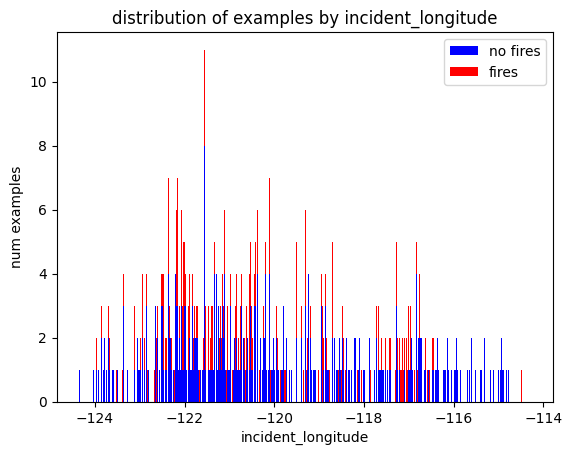

In [ ]:
hist_discrete_feature_distribution_by_label(df, "incident_longitude")

In [ ]:
# Can't open too many plots at once
features_0_20 = list(df.columns)[:20]
features_20_40 = list(df.columns)[20:40]
features_40_60 = list(df.columns)[40:60]
features_60_ = list(df.columns)[60:]

  0%|          | 0/20 [00:00<?, ?it/s]

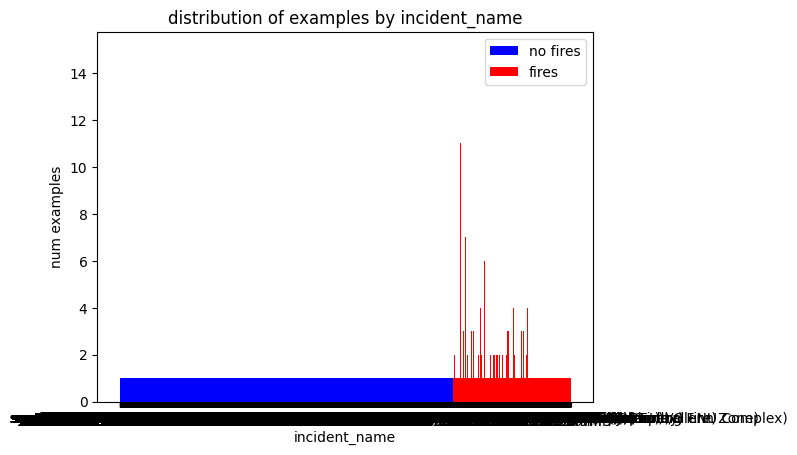

  5%|▌         | 1/20 [01:09<21:54, 69.18s/it]

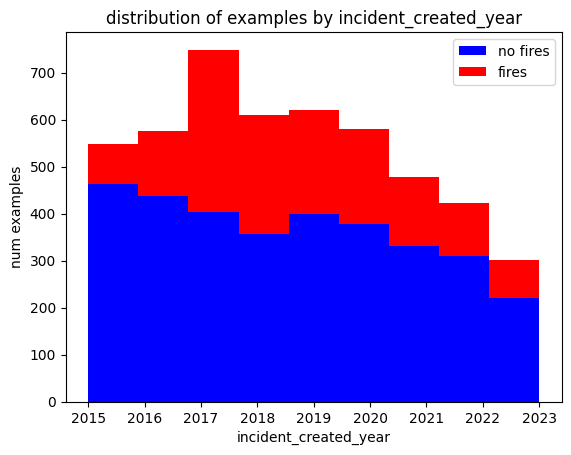

 10%|█         | 2/20 [01:09<08:35, 28.66s/it]

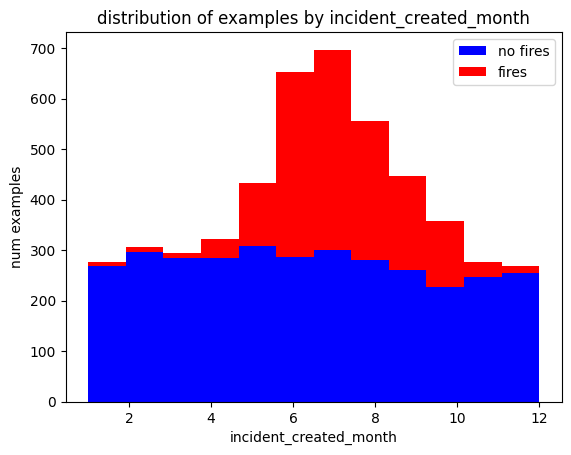

 15%|█▌        | 3/20 [01:09<04:27, 15.71s/it]

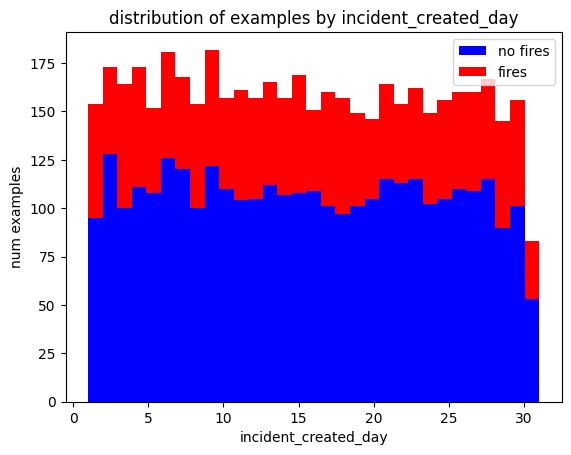

 20%|██        | 4/20 [01:10<02:34,  9.66s/it]

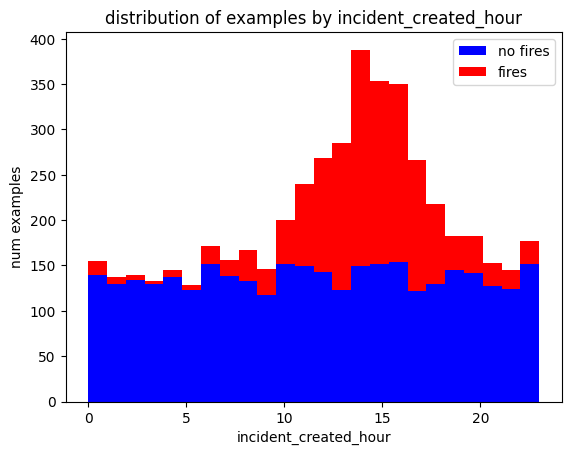

 25%|██▌       | 5/20 [01:10<01:34,  6.31s/it]

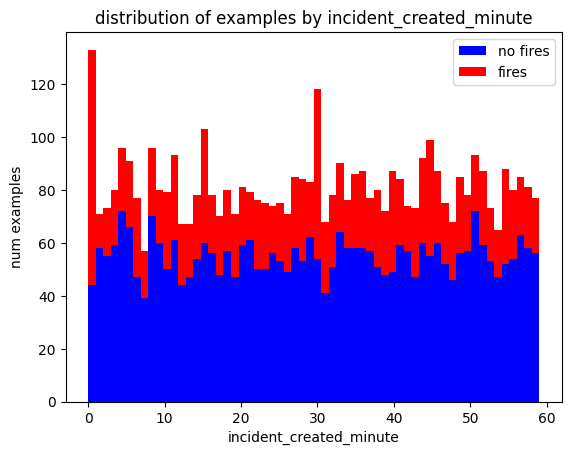

 30%|███       | 6/20 [01:10<01:00,  4.32s/it]

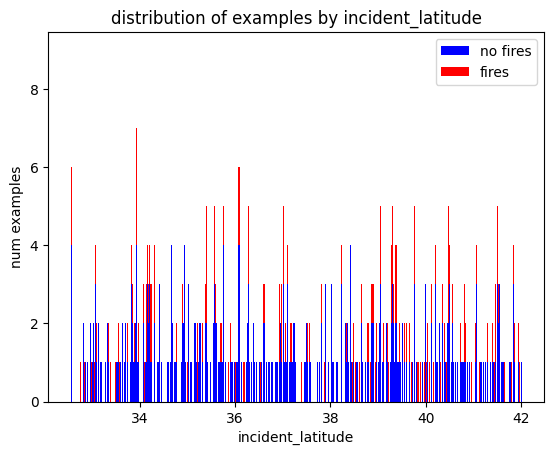

 35%|███▌      | 7/20 [01:27<01:48,  8.36s/it]

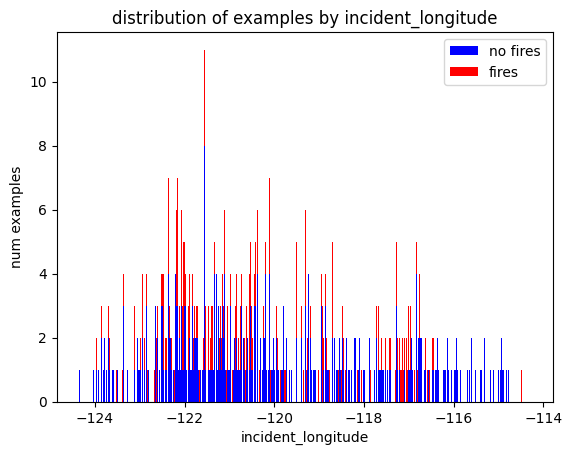

 40%|████      | 8/20 [01:44<02:12, 11.02s/it]

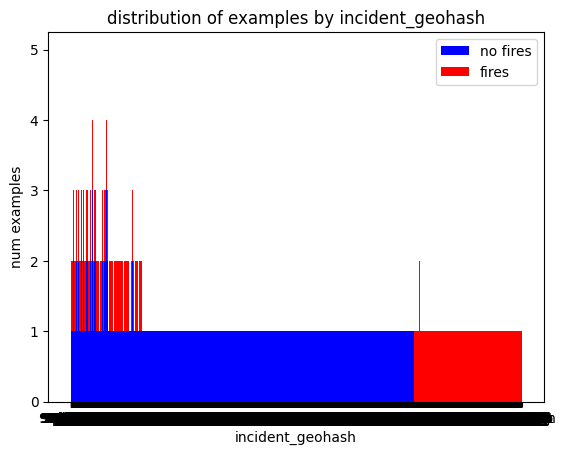

 45%|████▌     | 9/20 [02:32<04:10, 22.73s/it]

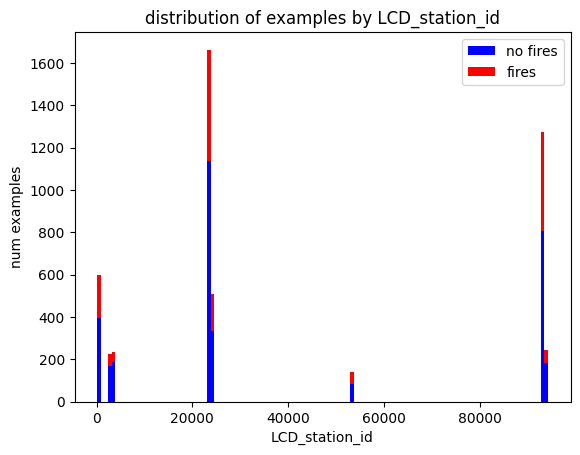

 50%|█████     | 10/20 [02:33<02:39, 15.92s/it]

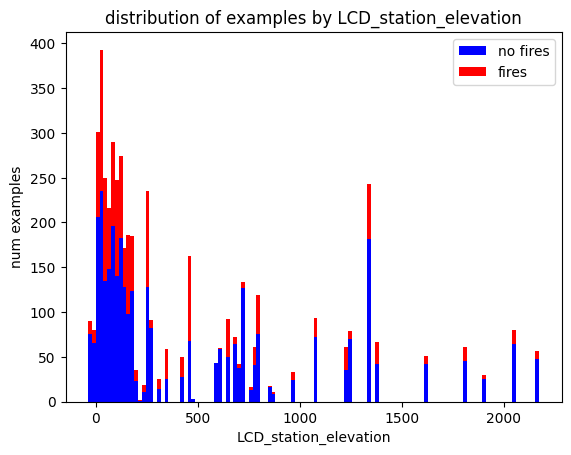

 55%|█████▌    | 11/20 [02:34<01:41, 11.25s/it]

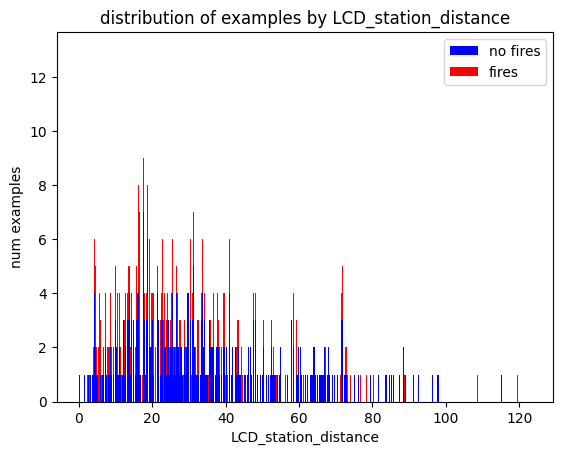

 60%|██████    | 12/20 [02:50<01:42, 12.86s/it]

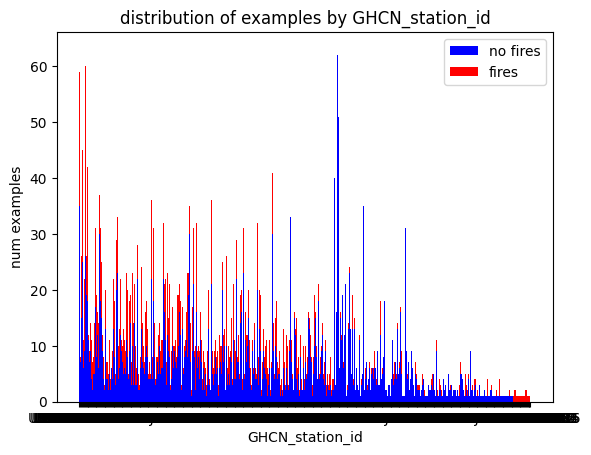

 65%|██████▌   | 13/20 [02:57<01:16, 10.87s/it]

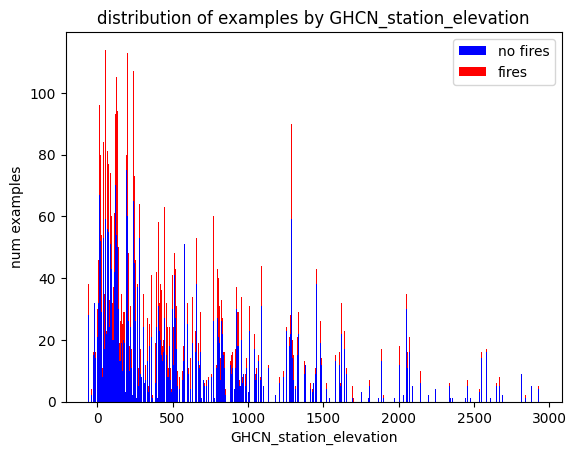

 70%|███████   | 14/20 [02:59<00:50,  8.43s/it]

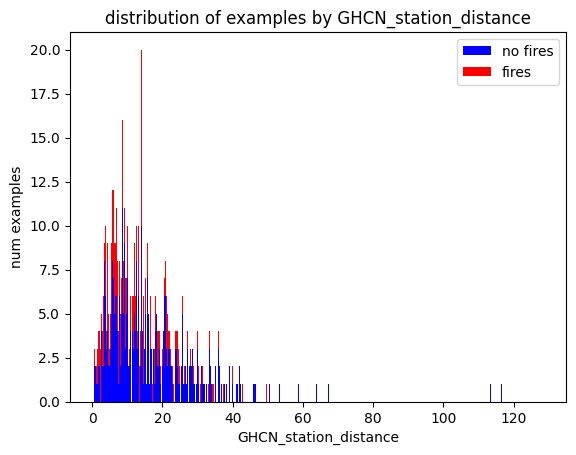

 75%|███████▌  | 15/20 [03:16<00:54, 10.90s/it]

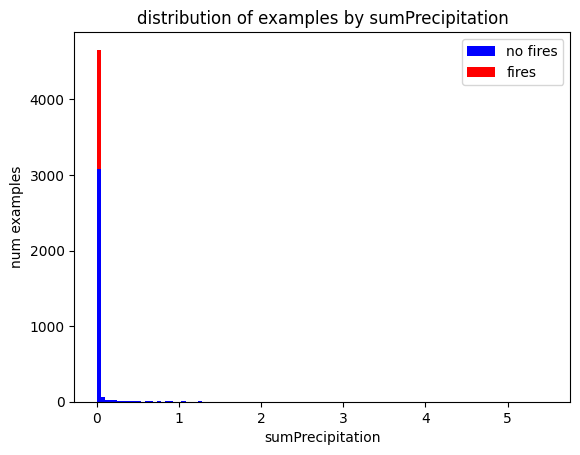

 80%|████████  | 16/20 [03:17<00:31,  7.88s/it]

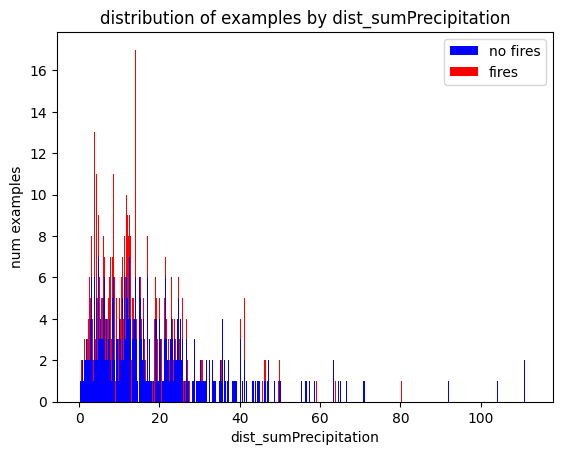

 85%|████████▌ | 17/20 [03:35<00:32, 10.94s/it]

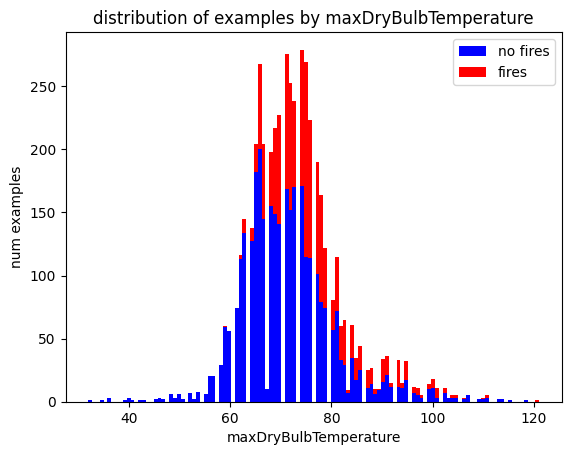

 90%|█████████ | 18/20 [03:35<00:15,  7.84s/it]

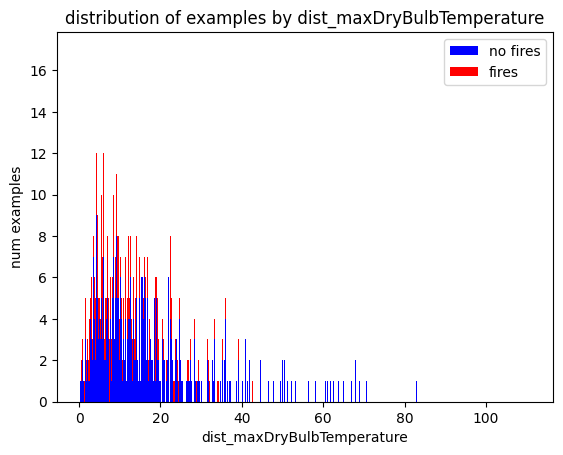

 95%|█████████▌| 19/20 [03:53<00:10, 10.78s/it]

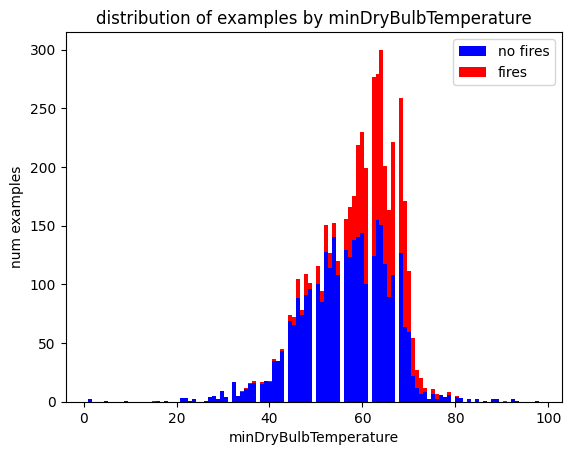

100%|██████████| 20/20 [03:54<00:00, 11.71s/it]


In [ ]:
hists_0_20 = {}
for label in tqdm(features_0_20):
  hists_0_20[label] = hist_discrete_feature_distribution_by_label(df, label)

  0%|          | 0/20 [00:00<?, ?it/s]

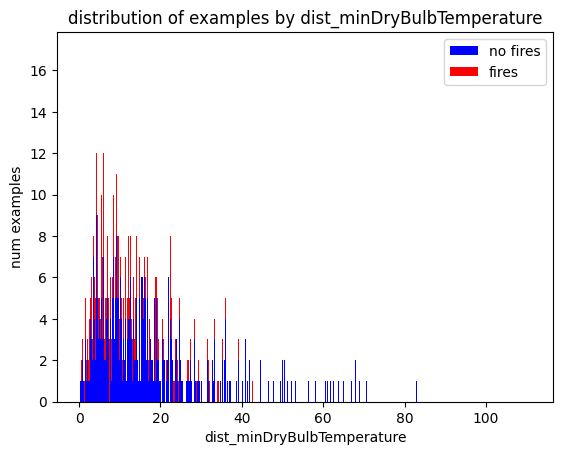

  5%|▌         | 1/20 [00:17<05:38, 17.81s/it]

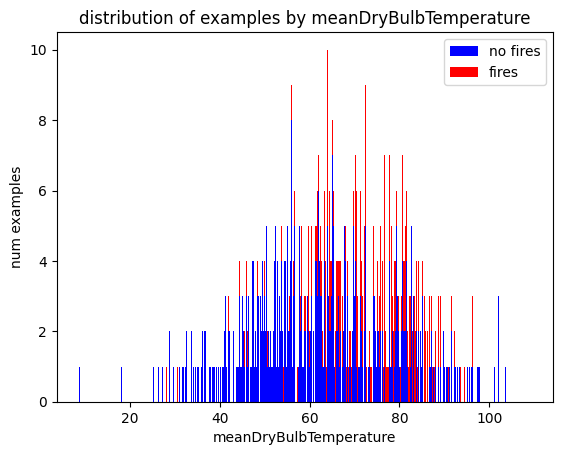

 10%|█         | 2/20 [00:32<04:42, 15.70s/it]

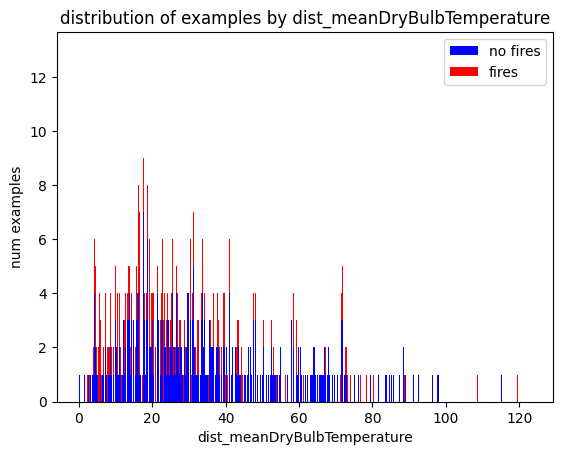

 15%|█▌        | 3/20 [00:50<04:47, 16.93s/it]

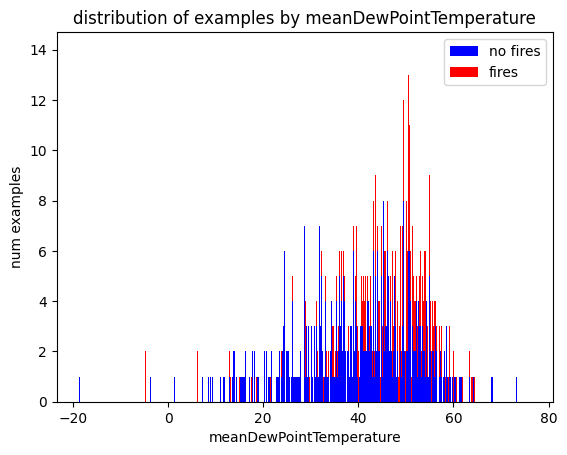

 20%|██        | 4/20 [01:03<04:06, 15.42s/it]

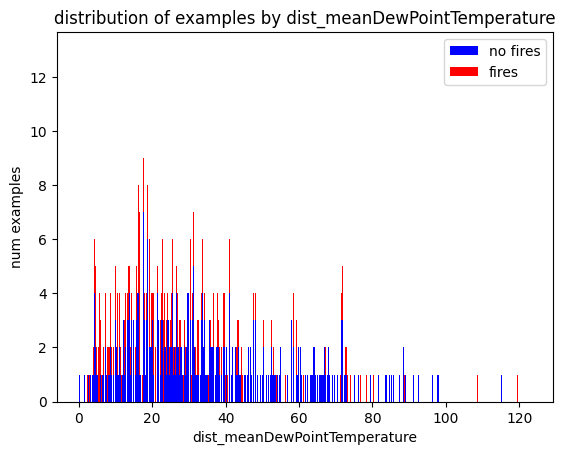

 25%|██▌       | 5/20 [01:19<03:55, 15.69s/it]

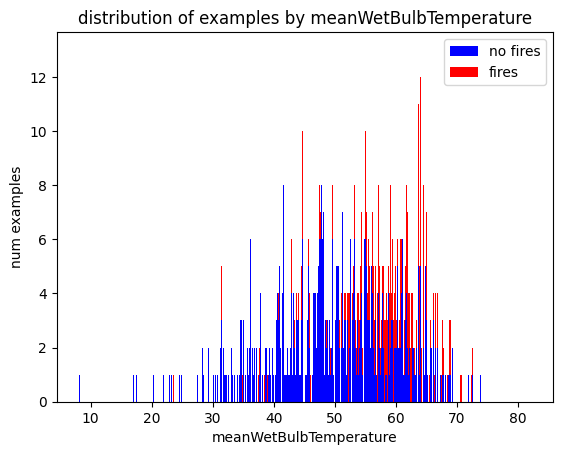

 30%|███       | 6/20 [01:33<03:29, 14.98s/it]

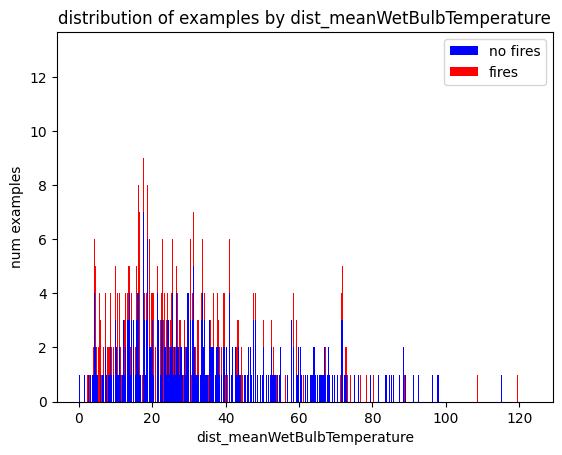

 35%|███▌      | 7/20 [01:50<03:22, 15.60s/it]

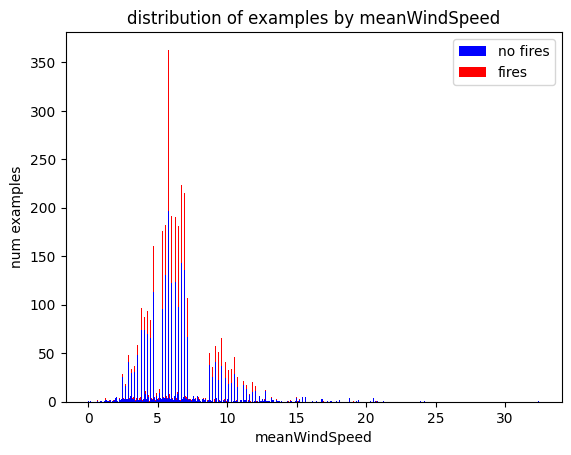

 40%|████      | 8/20 [01:52<02:15, 11.33s/it]

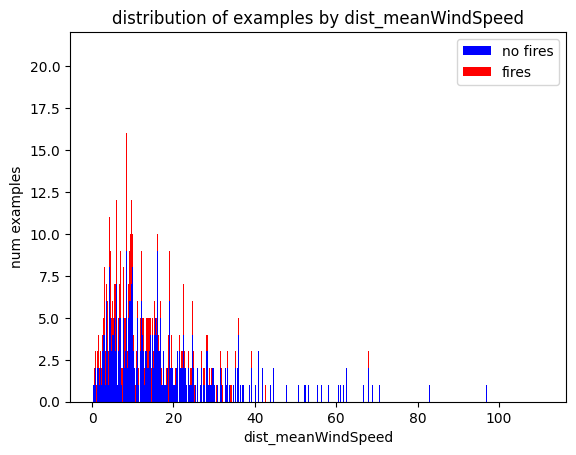

 45%|████▌     | 9/20 [02:09<02:24, 13.13s/it]

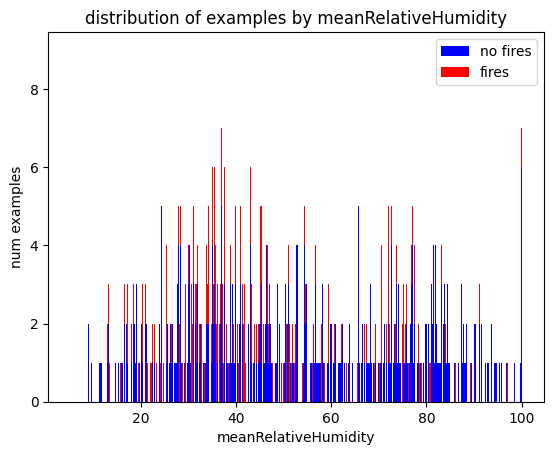

 50%|█████     | 10/20 [02:24<02:18, 13.80s/it]

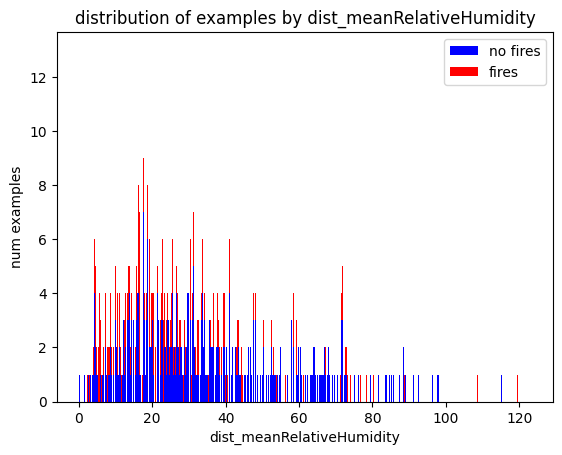

 55%|█████▌    | 11/20 [02:41<02:12, 14.70s/it]

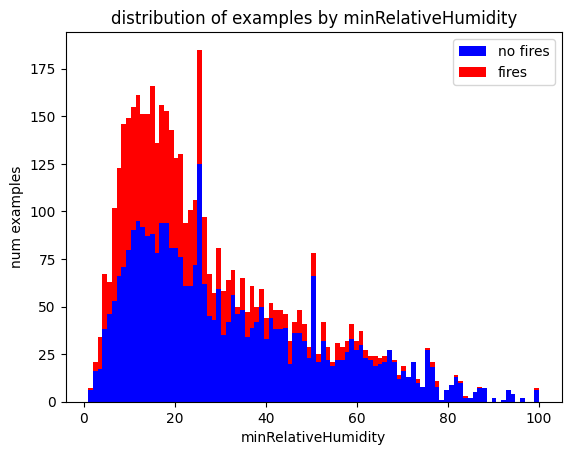

 60%|██████    | 12/20 [02:42<01:23, 10.40s/it]

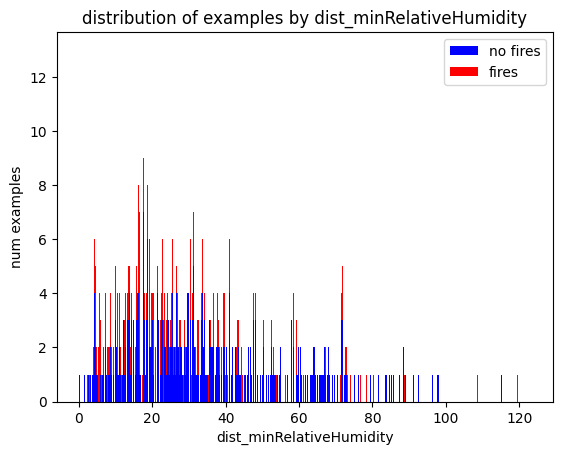

 65%|██████▌   | 13/20 [02:58<01:26, 12.36s/it]

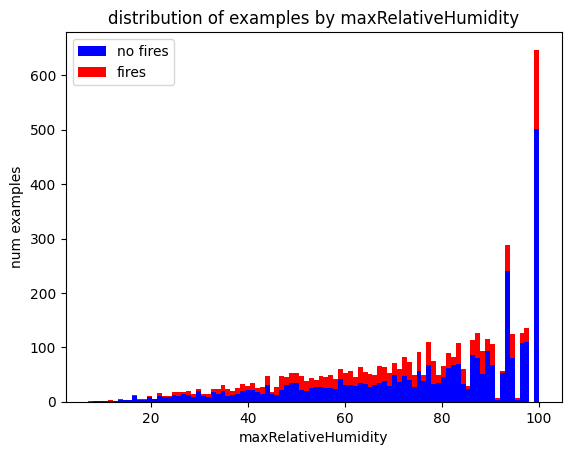

 70%|███████   | 14/20 [02:59<00:52,  8.80s/it]

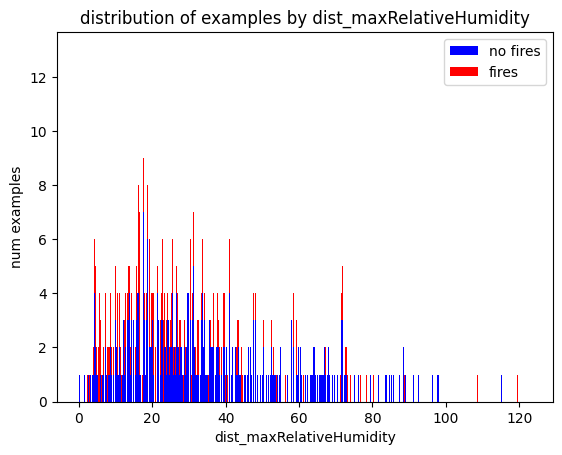

 75%|███████▌  | 15/20 [03:16<00:56, 11.29s/it]

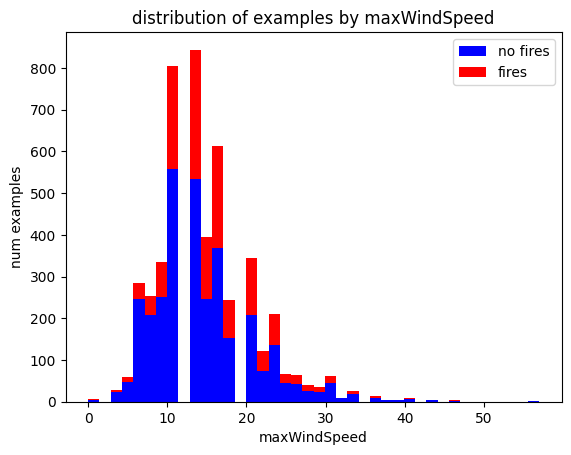

 80%|████████  | 16/20 [03:16<00:32,  8.01s/it]

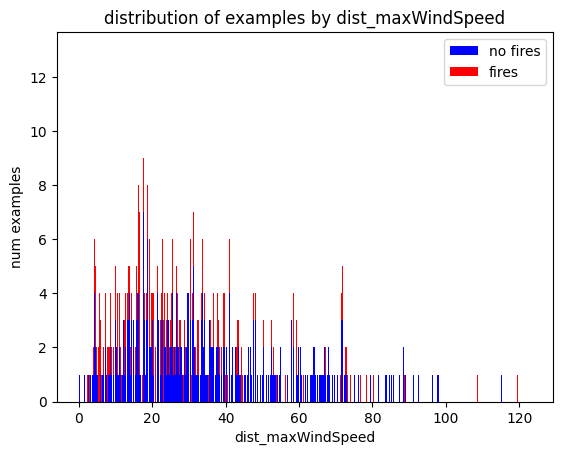

 85%|████████▌ | 17/20 [03:33<00:32, 10.67s/it]

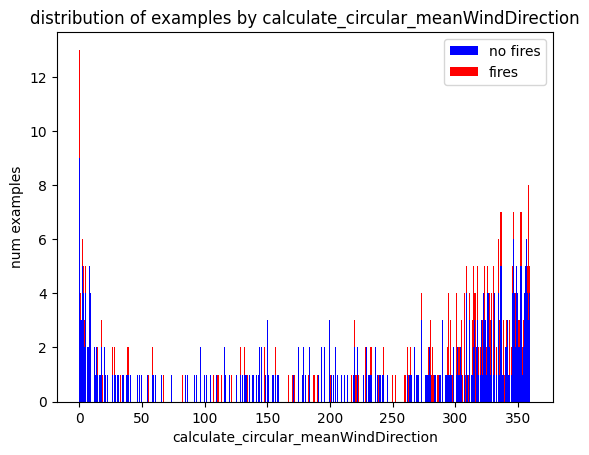

 90%|█████████ | 18/20 [03:52<00:26, 13.18s/it]

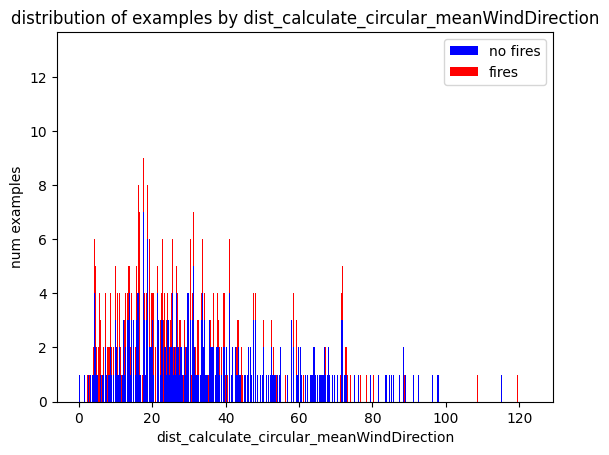

 95%|█████████▌| 19/20 [04:09<00:14, 14.23s/it]

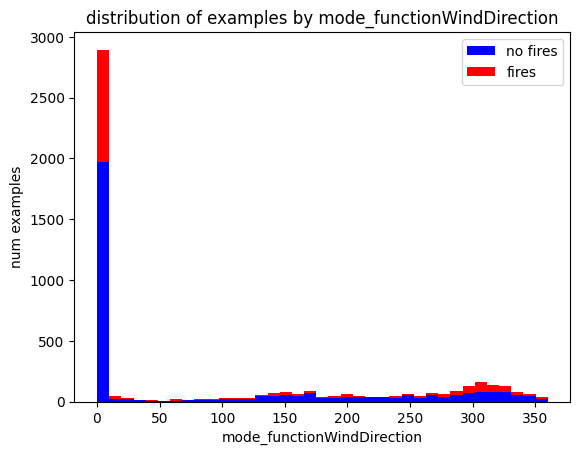

100%|██████████| 20/20 [04:09<00:00, 12.50s/it]


In [14]:
hists_20_40 = {}
for label in tqdm(features_20_40):
  hists_20_40[label] = hist_discrete_feature_distribution_by_label(df, label)

  0%|          | 0/20 [00:00<?, ?it/s]

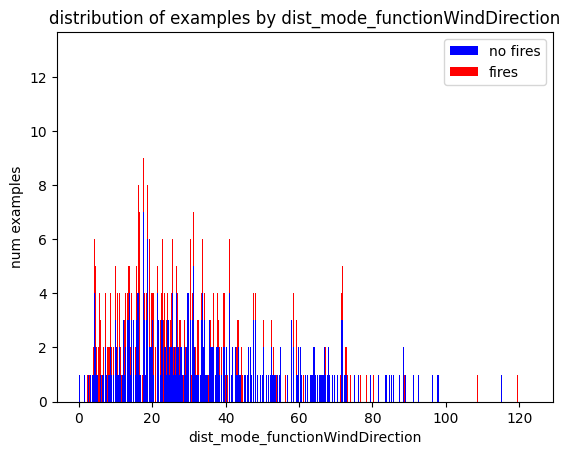

  5%|▌         | 1/20 [00:16<05:19, 16.81s/it]

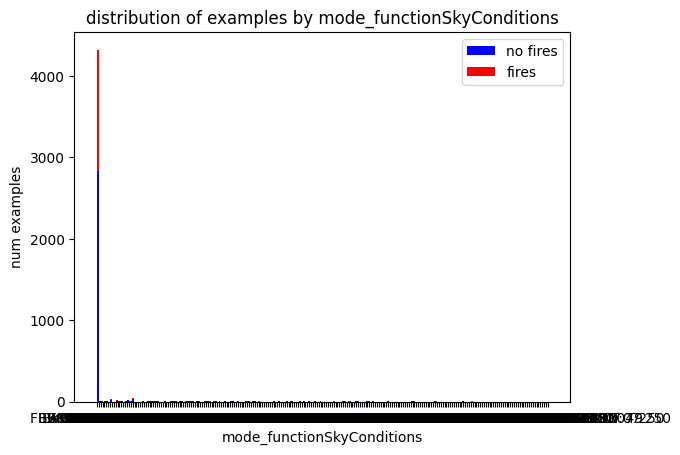

 10%|█         | 2/20 [00:20<02:39,  8.85s/it]

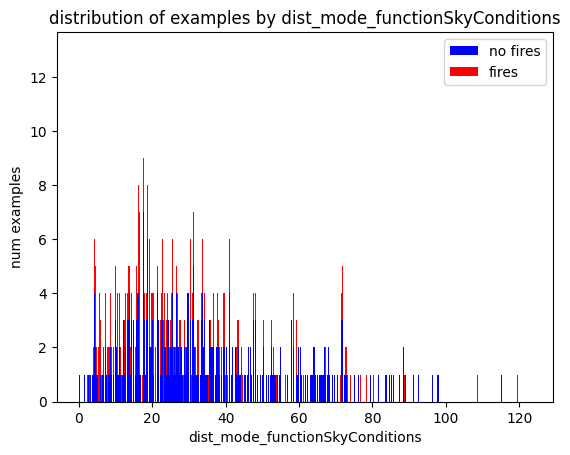

 15%|█▌        | 3/20 [00:37<03:35, 12.68s/it]

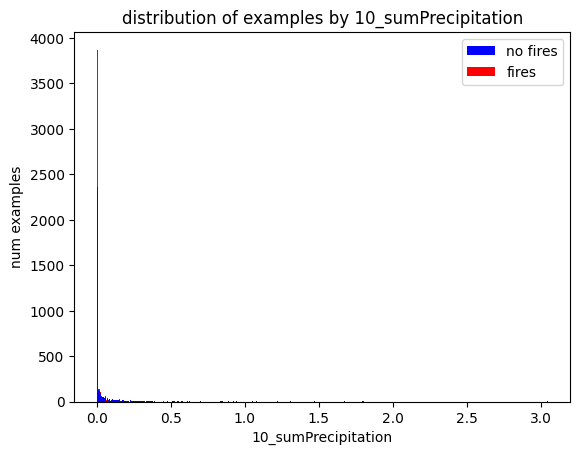

 20%|██        | 4/20 [00:39<02:18,  8.63s/it]

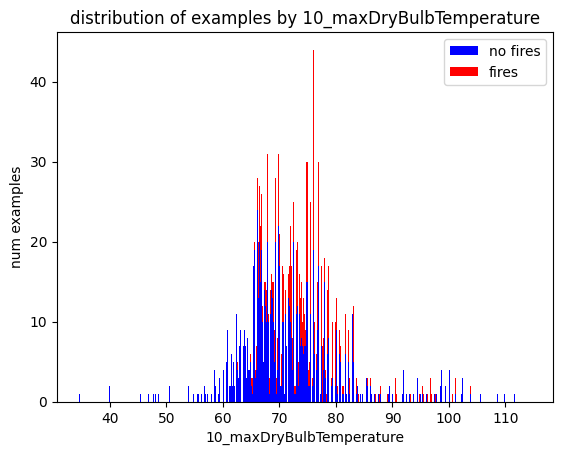

 25%|██▌       | 5/20 [00:46<01:58,  7.87s/it]

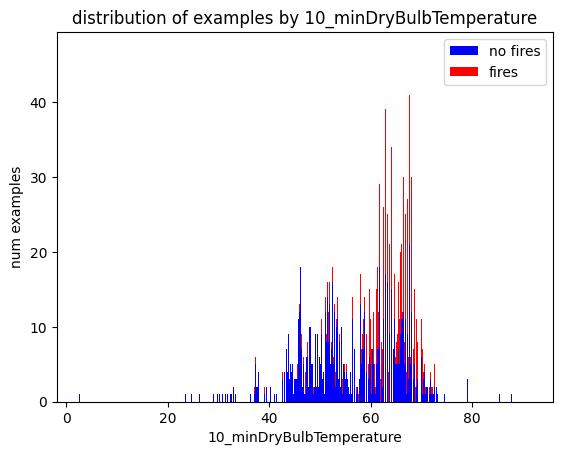

 30%|███       | 6/20 [00:52<01:43,  7.42s/it]

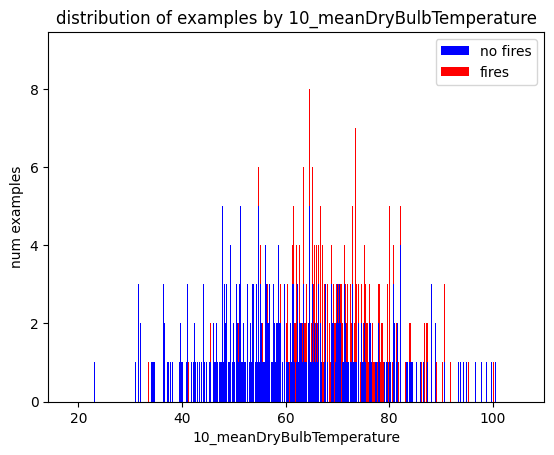

 35%|███▌      | 7/20 [01:13<02:31, 11.68s/it]

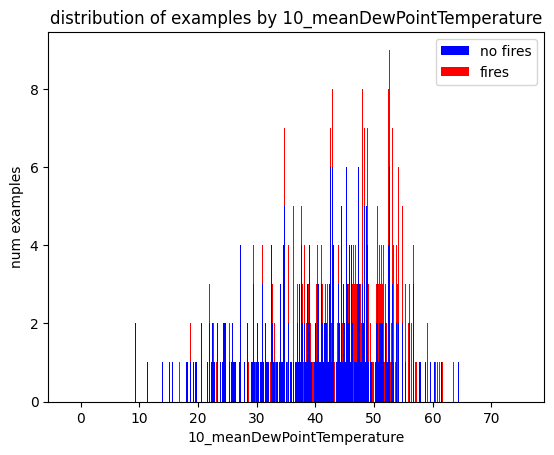

 40%|████      | 8/20 [01:34<02:55, 14.59s/it]

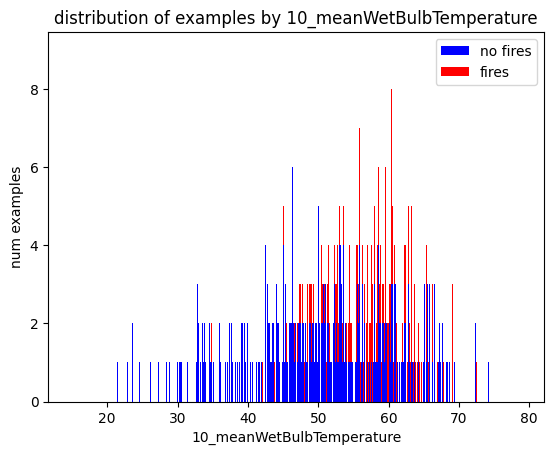

 45%|████▌     | 9/20 [01:54<02:59, 16.30s/it]

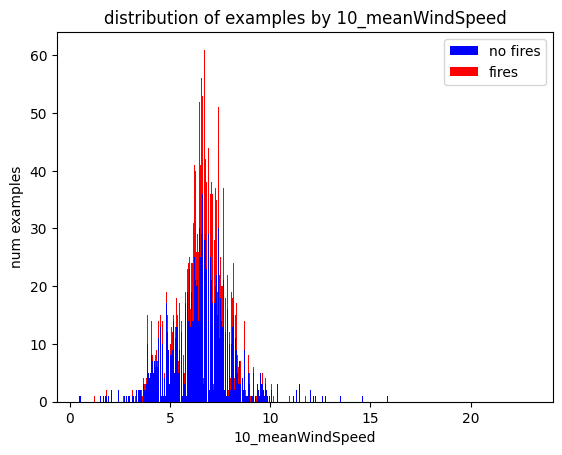

 50%|█████     | 10/20 [01:58<02:05, 12.60s/it]

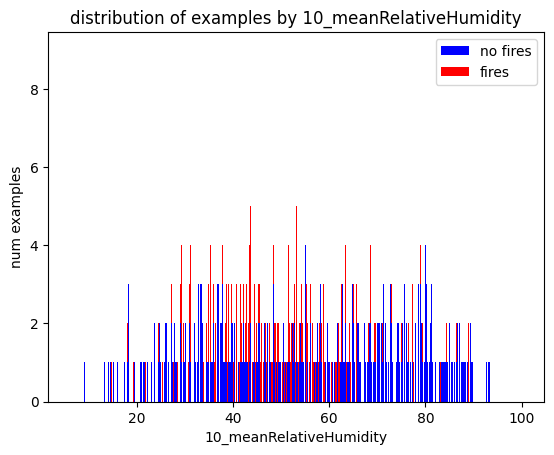

 55%|█████▌    | 11/20 [02:18<02:12, 14.75s/it]

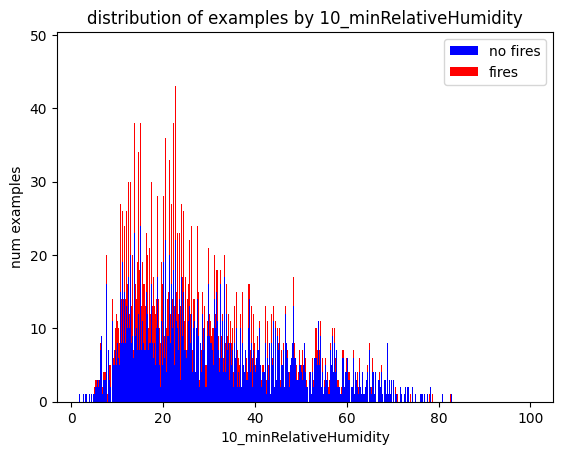

 60%|██████    | 12/20 [02:22<01:33, 11.73s/it]

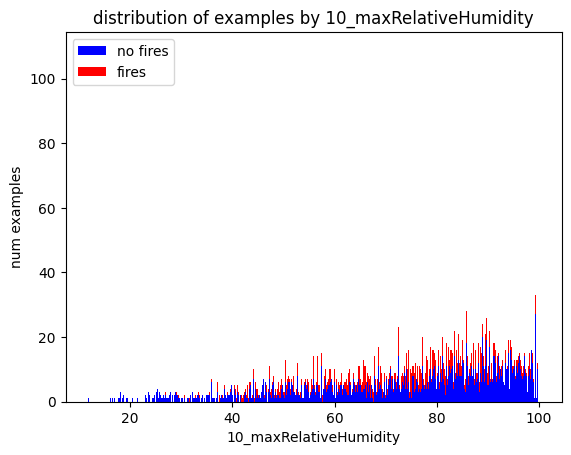

 65%|██████▌   | 13/20 [02:26<01:04,  9.19s/it]

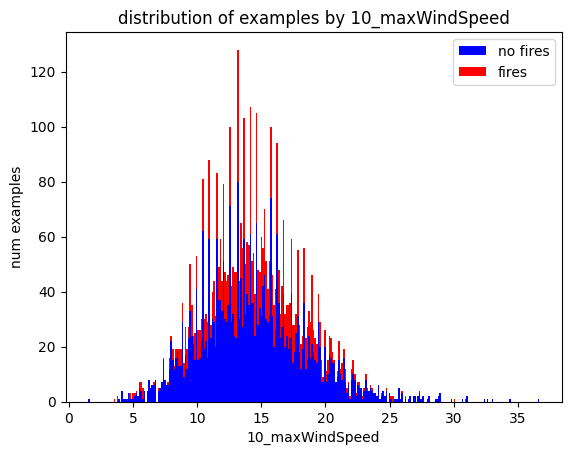

 70%|███████   | 14/20 [02:27<00:41,  6.84s/it]

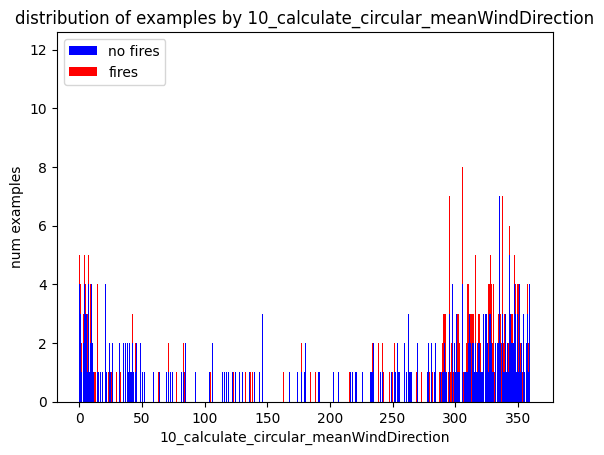

 75%|███████▌  | 15/20 [02:47<00:53, 10.61s/it]

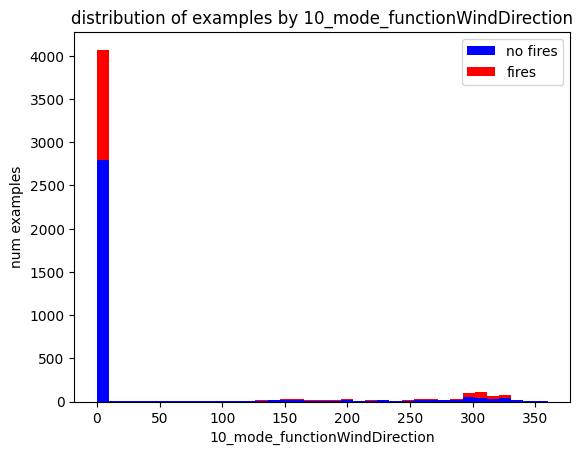

 80%|████████  | 16/20 [02:47<00:30,  7.54s/it]

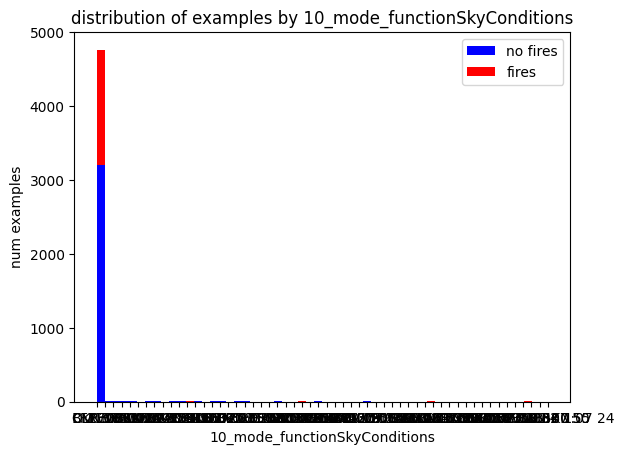

 85%|████████▌ | 17/20 [02:48<00:16,  5.48s/it]

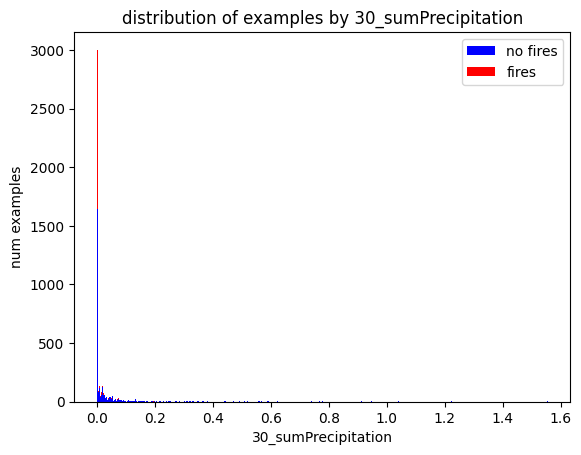

 90%|█████████ | 18/20 [02:50<00:09,  4.53s/it]

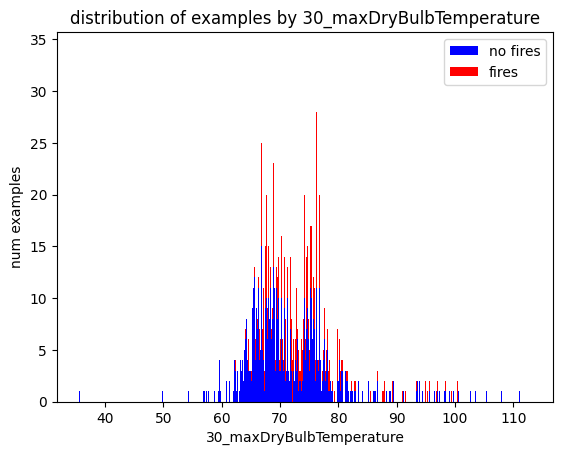

 95%|█████████▌| 19/20 [03:01<00:06,  6.54s/it]

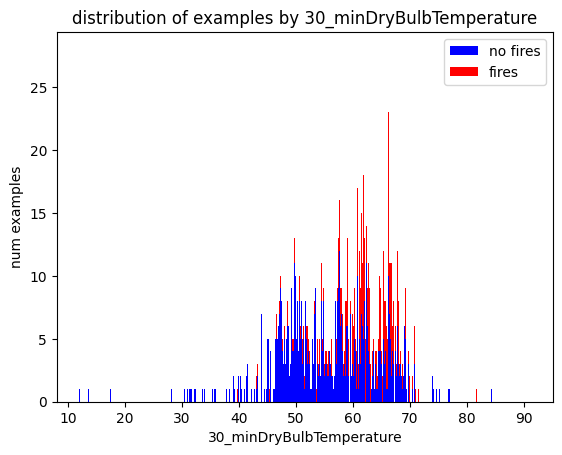

100%|██████████| 20/20 [03:11<00:00,  9.57s/it]


In [15]:
hists_40_60 = {}
for label in tqdm(features_40_60):
  hists_40_60[label] = hist_discrete_feature_distribution_by_label(df, label)

  0%|          | 0/28 [00:00<?, ?it/s]

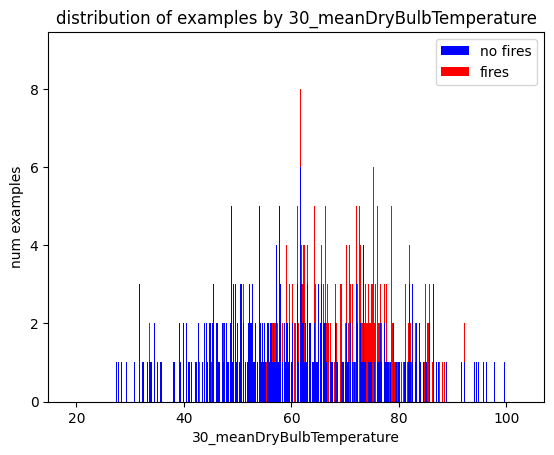

  4%|▎         | 1/28 [00:20<09:25, 20.93s/it]

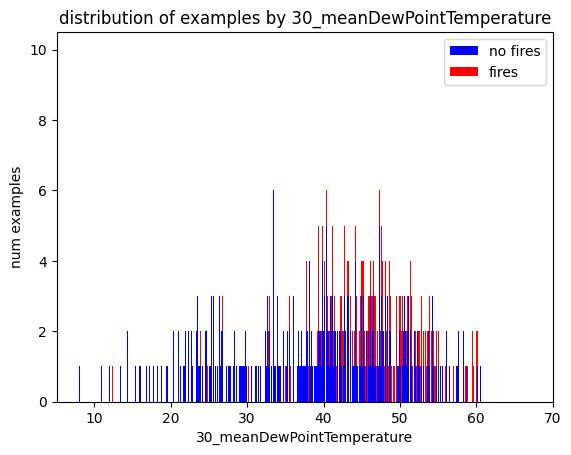

  7%|▋         | 2/28 [00:41<08:51, 20.43s/it]

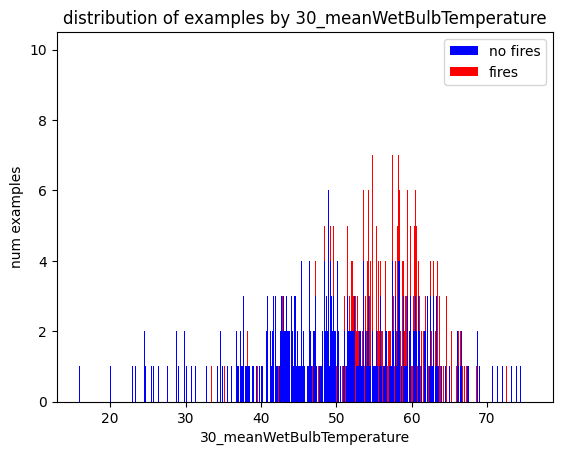

 11%|█         | 3/28 [01:00<08:21, 20.05s/it]

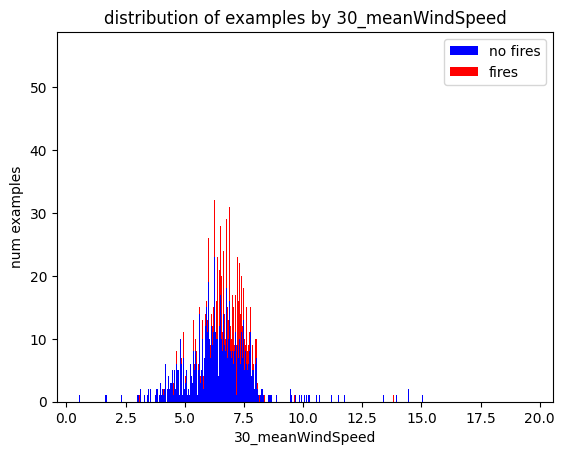

 14%|█▍        | 4/28 [01:09<06:16, 15.68s/it]

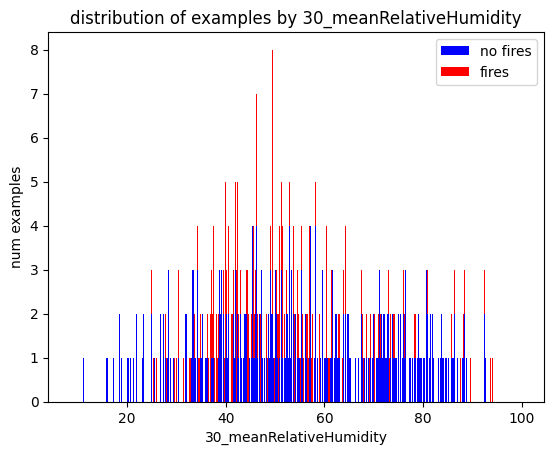

 18%|█▊        | 5/28 [01:30<06:43, 17.52s/it]

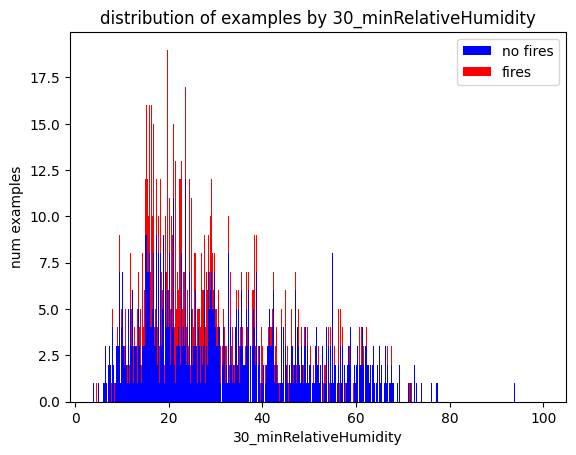

 21%|██▏       | 6/28 [01:37<05:07, 13.96s/it]

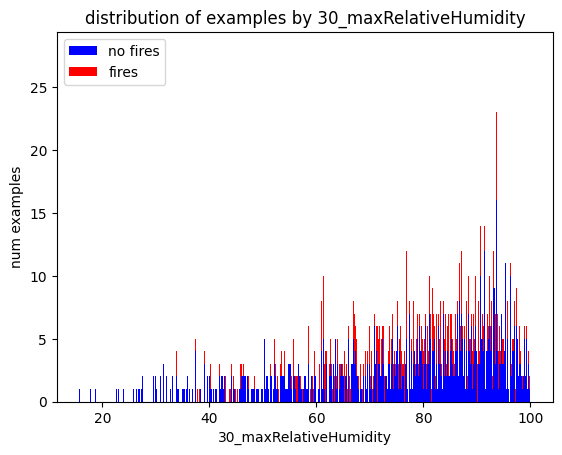

 25%|██▌       | 7/28 [01:46<04:21, 12.45s/it]

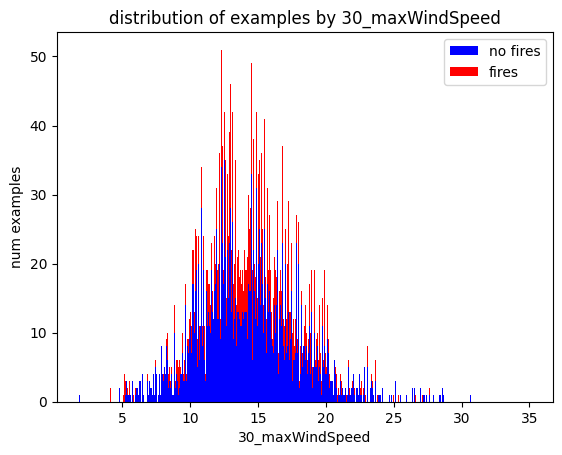

 29%|██▊       | 8/28 [01:49<03:09,  9.47s/it]

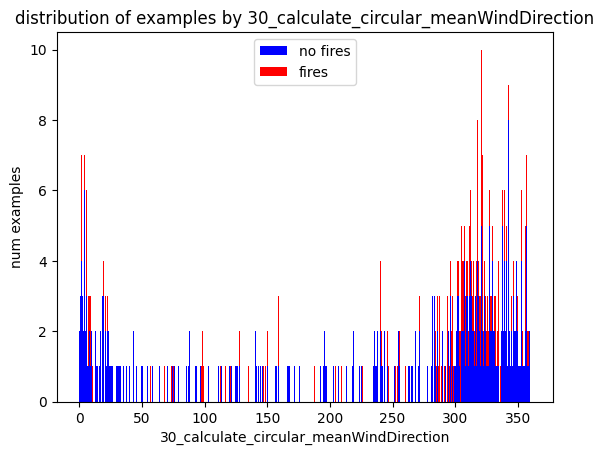

 32%|███▏      | 9/28 [02:11<04:10, 13.17s/it]

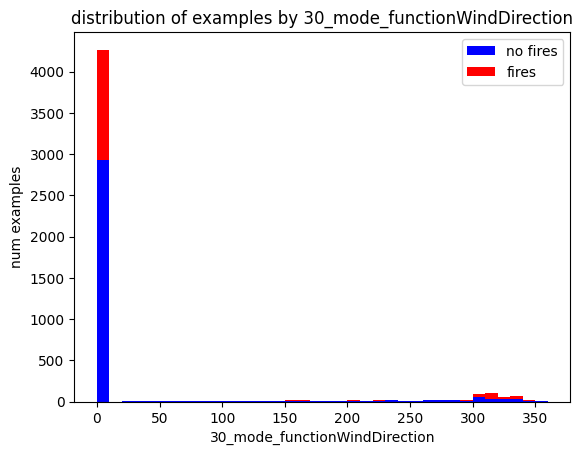

 36%|███▌      | 10/28 [02:11<02:45,  9.22s/it]

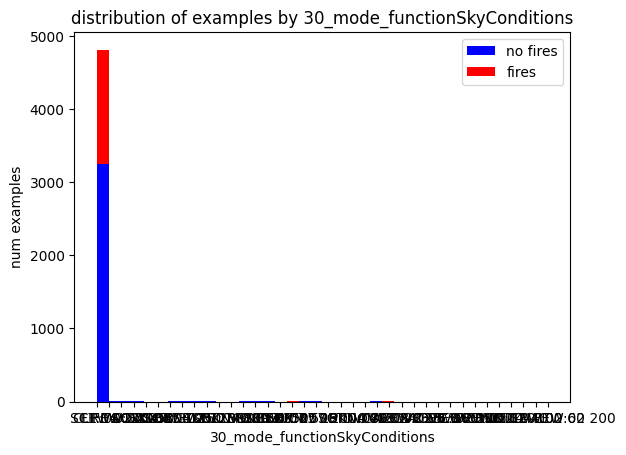

 39%|███▉      | 11/28 [02:12<01:51,  6.57s/it]

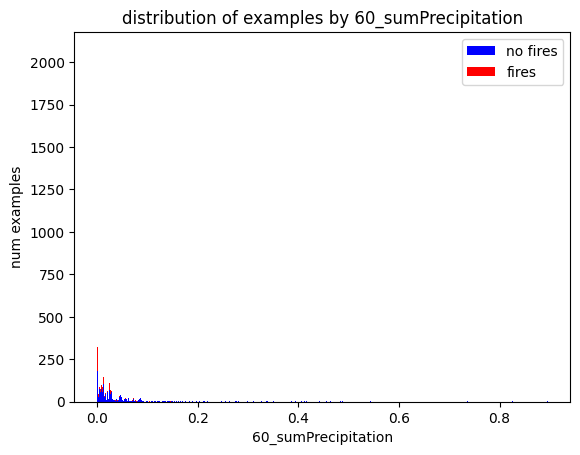

 43%|████▎     | 12/28 [02:15<01:29,  5.62s/it]

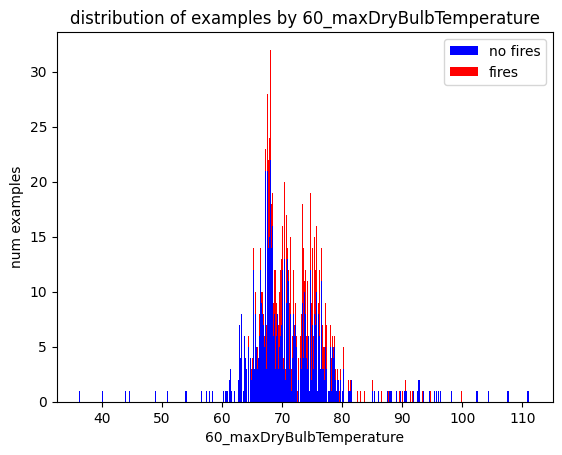

 46%|████▋     | 13/28 [02:27<01:50,  7.39s/it]

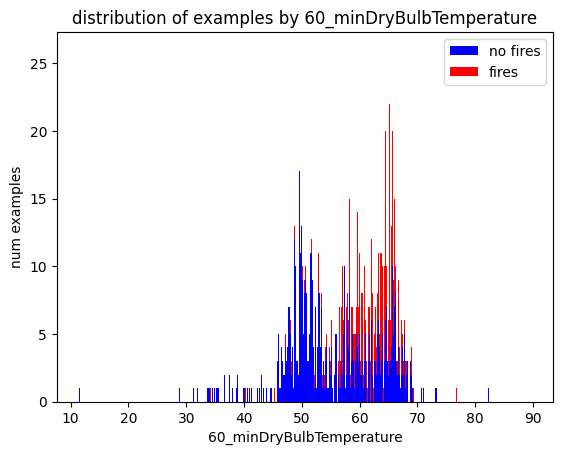

 50%|█████     | 14/28 [02:39<02:05,  8.94s/it]

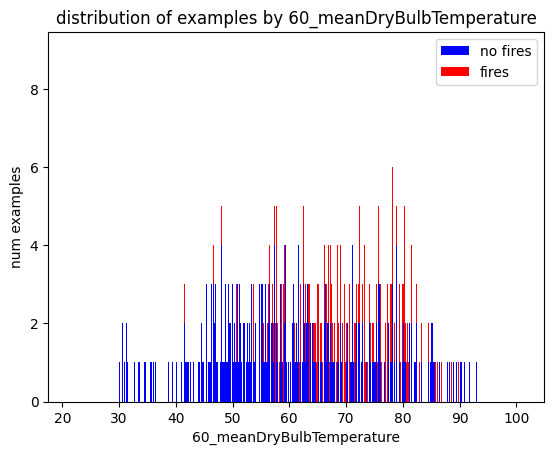

 54%|█████▎    | 15/28 [02:59<02:40, 12.32s/it]

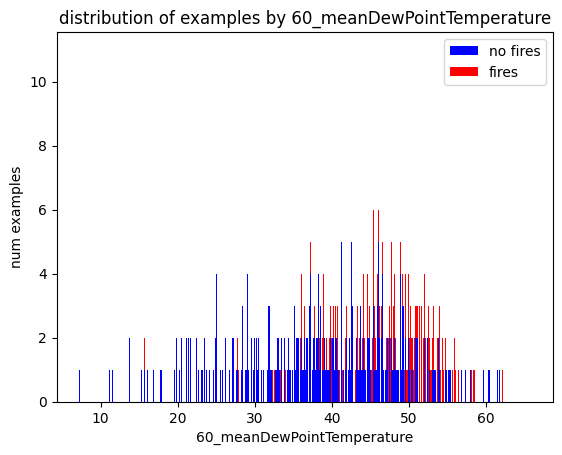

 57%|█████▋    | 16/28 [03:19<02:53, 14.46s/it]

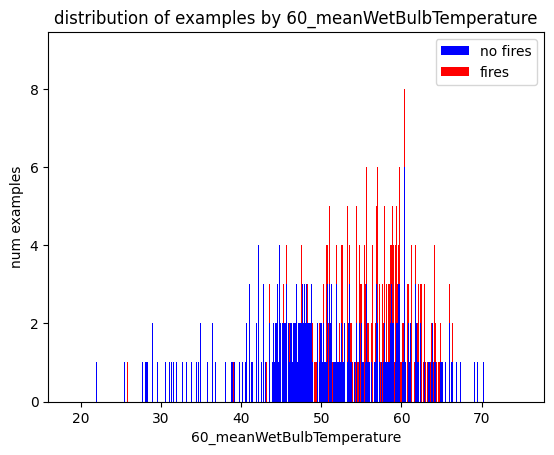

 61%|██████    | 17/28 [03:38<02:54, 15.88s/it]

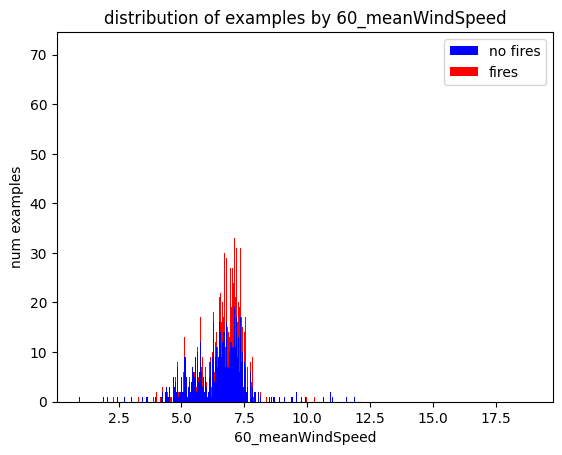

 64%|██████▍   | 18/28 [03:49<02:24, 14.41s/it]

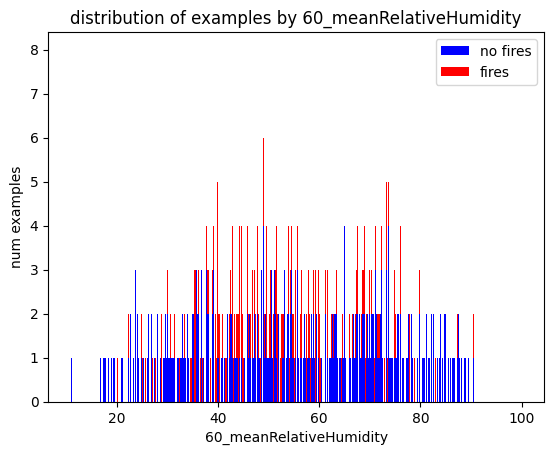

 68%|██████▊   | 19/28 [04:09<02:24, 16.03s/it]

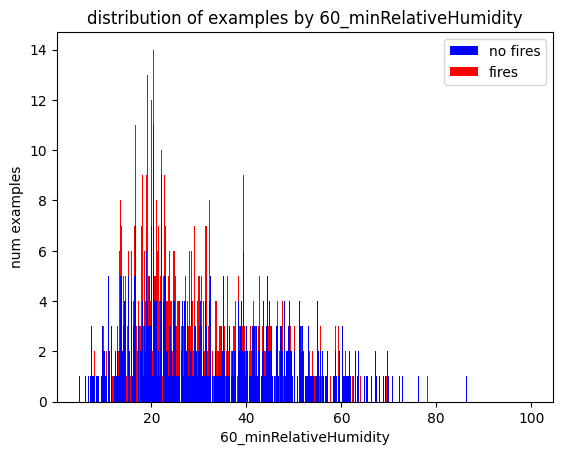

 71%|███████▏  | 20/28 [04:22<02:00, 15.11s/it]

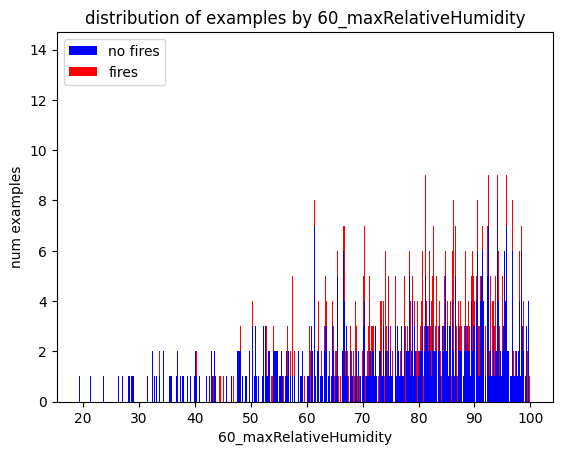

 75%|███████▌  | 21/28 [04:32<01:35, 13.69s/it]

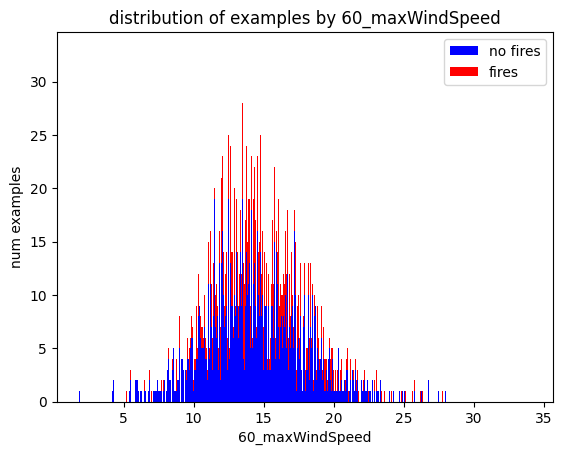

 79%|███████▊  | 22/28 [04:39<01:10, 11.67s/it]

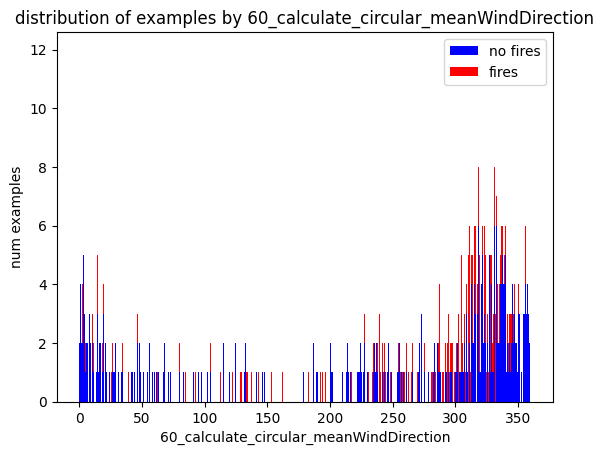

 82%|████████▏ | 23/28 [04:59<01:10, 14.05s/it]

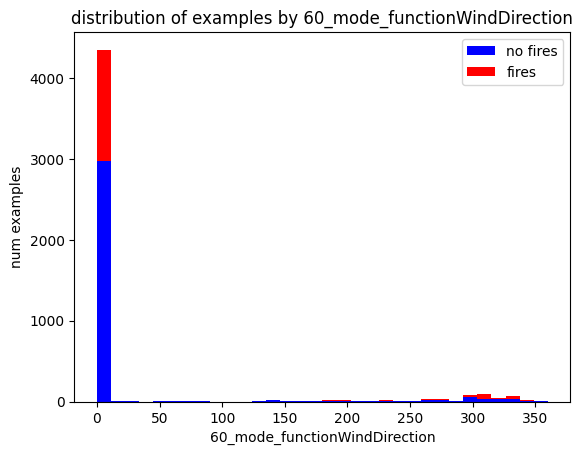

 86%|████████▌ | 24/28 [04:59<00:39,  9.94s/it]

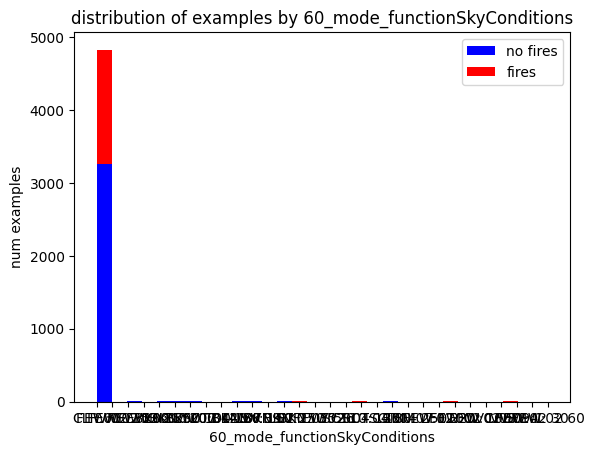

 89%|████████▉ | 25/28 [04:59<00:21,  7.10s/it]

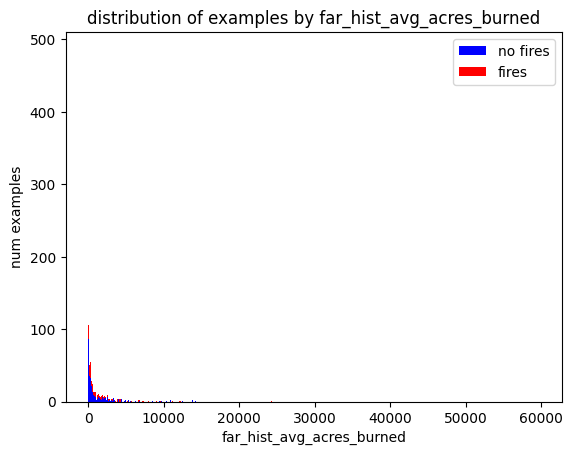

 93%|█████████▎| 26/28 [05:19<00:21, 10.74s/it]

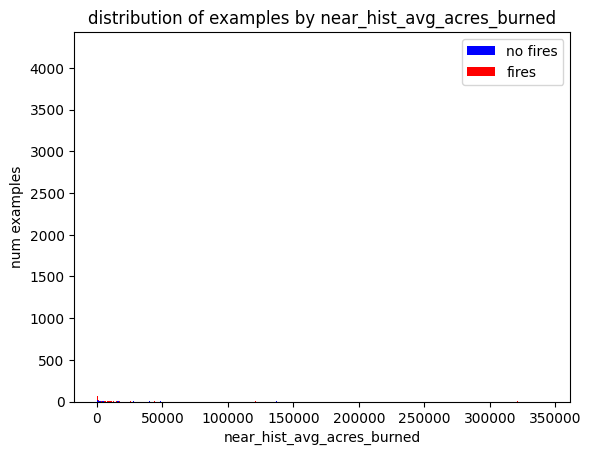

 96%|█████████▋| 27/28 [05:28<00:10, 10.34s/it]

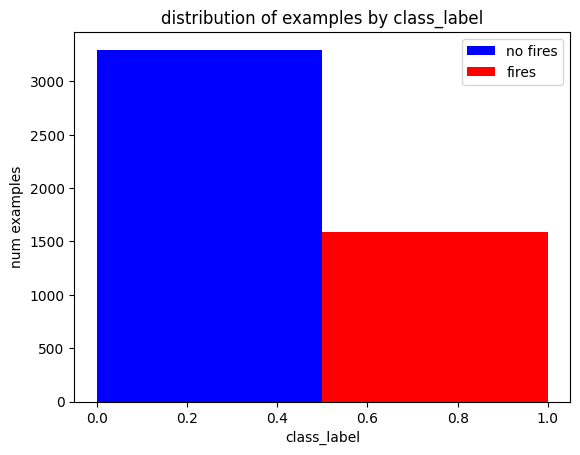

100%|██████████| 28/28 [05:28<00:00, 11.75s/it]


In [16]:
hists_60_ = {}
for label in tqdm(features_60_):
  hists_60_[label] = hist_discrete_feature_distribution_by_label(df, label)

### Correlation

From https://www.w3schools.com/python/pandas/pandas_correlations.asp:
> "The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
>
> The number varies from -1 to 1.
>
> 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
>
> 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
>
> -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
>
> 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.
>
> What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation."

--> We want to keep variables that are NOT strongly correlated with each other.



In [ ]:
# https://medium.com/omics-diary/how-to-calculate-pearson-spearman-and-phik-correlation-between-variables-using-python-3853513ca9c2
full_corr_matrix = df.phik_matrix()
full_corr_matrix

interval columns not set, guessing: ['incident_created_year', 'incident_created_month', 'incident_created_day', 'incident_created_hour', 'incident_created_minute', 'incident_latitude', 'incident_longitude', 'LCD_station_id', 'LCD_station_elevation', 'LCD_station_distance', 'GHCN_station_elevation', 'GHCN_station_distance', 'sumPrecipitation', 'dist_sumPrecipitation', 'maxDryBulbTemperature', 'dist_maxDryBulbTemperature', 'minDryBulbTemperature', 'dist_minDryBulbTemperature', 'meanDryBulbTemperature', 'dist_meanDryBulbTemperature', 'meanDewPointTemperature', 'dist_meanDewPointTemperature', 'meanWetBulbTemperature', 'dist_meanWetBulbTemperature', 'meanWindSpeed', 'dist_meanWindSpeed', 'meanRelativeHumidity', 'dist_meanRelativeHumidity', 'minRelativeHumidity', 'dist_minRelativeHumidity', 'maxRelativeHumidity', 'dist_maxRelativeHumidity', 'maxWindSpeed', 'dist_maxWindSpeed', 'calculate_circular_meanWindDirection', 'dist_calculate_circular_meanWindDirection', 'mode_functionWindDirection', '

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable incident_geohash is large: 4114. Are you sure this is not an interval variable? Analysis for pairs of variables including incident_geohash can be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable incident_name is large: 4458. Are you sure this is not an interval variable? Analysis for pairs of variables including incident_name can be slow.
  warnings.warn(


**Correlation matrix (Phi K -- nonlinear, noncontinuous)**

In [ ]:
features_for_corr_matrix = ["incident_created_year", "incident_created_month",
                            "incident_created_day", "incident_created_hour",
                            "incident_created_minute", "incident_latitude",
                            "incident_longitude", "sumPrecipitation",
                            "dist_sumPrecipitation", "meanDryBulbTemperature",
                            "dist_meanDryBulbTemperature",
                            "meanDewPointTemperature",
                            "dist_meanDewPointTemperature", "meanWindSpeed",
                            "meanRelativeHumidity", "dist_meanRelativeHumidity",
                            "maxWindSpeed", "dist_mode_functionSkyConditions",
                            "10_sumPrecipitation", "10_meanDryBulbTemperature",
                            "10_meanDewPointTemperature",
                            "10_meanRelativeHumidity", "30_sumPrecipitation",
                            "30_meanDryBulbTemperature",
                            "30_meanDewPointTemperature",
                            "30_meanRelativeHumidity", "60_sumPrecipitation",
                            "60_meanDryBulbTemperature",
                            "60_meanDewPointTemperature",
                            "60_meanRelativeHumidity",
                            "far_hist_avg_acres_burned",
                            "near_hist_avg_acres_burned", "class_label"]

In [ ]:
# features_for_corr_matrix = ['incident_created_year', 'incident_created_month',
#                             'incident_created_day', 'incident_created_hour',
#                             'incident_latitude', 'incident_longitude',
#                             'sumPrecipitation', 'sumPrecipitation_station_dist',
#                             'maxDryBulbTemperature', 'maxDryBulbTemperature_station_dist',
#                             '', '',  # 10-day humidity, wet bulb, temp
#                             'far_hist_avg_acres_burned', 'near_hist_avg_acres_burned',
#                             'class_label']
# POSSIBLE OVERFLOW
corr_matrix = df[features_for_corr_matrix].phik_matrix()
corr_matrix

interval columns not set, guessing: ['incident_created_year', 'incident_created_month', 'incident_created_day', 'incident_created_hour', 'incident_created_minute', 'incident_latitude', 'incident_longitude', 'sumPrecipitation', 'dist_sumPrecipitation', 'meanDryBulbTemperature', 'dist_meanDryBulbTemperature', 'meanDewPointTemperature', 'dist_meanDewPointTemperature', 'meanWindSpeed', 'meanRelativeHumidity', 'dist_meanRelativeHumidity', 'maxWindSpeed', 'dist_mode_functionSkyConditions', '10_sumPrecipitation', '10_meanDryBulbTemperature', '10_meanDewPointTemperature', '10_meanRelativeHumidity', '30_sumPrecipitation', '30_meanDryBulbTemperature', '30_meanDewPointTemperature', '30_meanRelativeHumidity', '60_sumPrecipitation', '60_meanDryBulbTemperature', '60_meanDewPointTemperature', '60_meanRelativeHumidity', 'far_hist_avg_acres_burned', 'near_hist_avg_acres_burned', 'class_label']


,incident_created_year,incident_created_month,incident_created_day,incident_created_hour,incident_created_minute,incident_latitude,incident_longitude,sumPrecipitation,dist_sumPrecipitation,meanDryBulbTemperature,dist_meanDryBulbTemperature,meanDewPointTemperature,dist_meanDewPointTemperature,meanWindSpeed,meanRelativeHumidity,dist_meanRelativeHumidity,maxWindSpeed,dist_mode_functionSkyConditions,10_sumPrecipitation,10_meanDryBulbTemperature,10_meanDewPointTemperature,10_meanRelativeHumidity,30_sumPrecipitation,30_meanDryBulbTemperature,30_meanDewPointTemperature,30_meanRelativeHumidity,60_sumPrecipitation,60_meanDryBulbTemperature,60_meanDewPointTemperature,60_meanRelativeHumidity,far_hist_avg_acres_burned,near_hist_avg_acres_burned,class_label
incident_created_year,1.000000,0.147160,0.000000,0.086342,0.042382,0.000000,0.036586,0.048312,0.070780,0.091125,0.027692,0.114961,0.027692,0.090740,0.108895,0.027692,0.051542,0.027692,0.089520,0.108379,0.135334,0.108262,0.126269,0.108243,0.180066,0.141401,0.137636,0.111428,0.173337,0.145033,0.056305,0.000000,0.205357
incident_created_month,0.147160,1.000000,0.158758,0.252494,0.048767,0.066547,0.128423,0.086441,0.092923,0.688478,0.086588,0.518132,0.086588,0.288035,0.422548,0.086588,0.332459,0.086588,0.101506,0.720634,0.568139,0.467324,0.153684,0.732089,0.595440,0.509446,0.251030,0.732858,0.600961,0.519697,0.000000,0.000000,0.586165
incident_created_day,0.000000,0.158758,1.000000,0.051819,0.033654,0.054861,0.039286,0.055794,0.038833,0.121084,0.032984,0.109961,0.032984,0.096738,0.015368,0.032984,0.052071,0.032984,0.041206,0.082990,0.047041,0.000000,0.000000,0.058516,0.058686,0.061325,0.000000,0.057587,0.027825,0.000000,0.037498,0.000000,0.000000
incident_created_hour,0.086342,0.252494,0.051819,1.000000,0.000000,0.064316,0.087607,0.059834,0.058797,0.176400,0.061631,0.147922,0.061631,0.047035,0.102311,0.061631,0.085236,0.061631,0.060060,0.205954,0.176245,0.094431,0.042819,0.187961,0.203490,0.067478,0.077546,0.183007,0.187947,0.051342,0.030553,0.078331,0.562395
incident_created_minute,0.042382,0.048767,0.033654,0.000000,1.000000,0.082483,0.000000,0.000000,0.049754,0.018334,0.068582,0.054111,0.068582,0.000000,0.000000,0.068582,0.024655,0.068582,0.000000,0.000000,0.073042,0.000000,0.012513,0.073487,0.057921,0.000000,0.032030,0.009348,0.000000,0.000000,0.036483,0.000000,0.037233
incident_latitude,0.000000,0.066547,0.054861,0.064316,0.082483,1.000000,0.796260,0.041292,0.330018,0.364867,0.520581,0.367452,0.520581,0.091640,0.331825,0.520581,0.328142,0.520581,0.000000,0.430618,0.418607,0.408095,0.034554,0.445902,0.467610,0.427804,0.082271,0.451704,0.470391,0.441211,0.249710,0.055734,0.137397
incident_longitude,0.036586,0.128423,0.039286,0.087607,0.000000,0.796260,1.000000,0.000000,0.447611,0.413451,0.428225,0.383782,0.428225,0.111330,0.508394,0.428225,0.245907,0.428225,0.000000,0.481000,0.407447,0.624081,0.000000,0.484875,0.444439,0.650011,0.000000,0.483105,0.447970,0.663720,0.226236,0.000000,0.248096
sumPrecipitation,0.048312,0.086441,0.055794,0.059834,0.000000,0.041292,0.000000,1.000000,0.046422,0.082159,0.053934,0.000000,0.053934,0.161701,0.130810,0.053934,0.161046,0.053934,0.694857,0.079471,0.000000,0.050037,0.483662,0.068085,0.016805,0.074989,0.404466,0.073683,0.045430,0.077574,0.000000,0.000000,0.052963
dist_sumPrecipitation,0.070780,0.092923,0.038833,0.058797,0.049754,0.330018,0.447611,0.046422,1.000000,0.201577,0.737506,0.221364,0.737506,0.100486,0.165762,0.737506,0.119818,0.737506,0.121241,0.232364,0.322606,0.292775,0.121378,0.253086,0.323781,0.299439,0.132899,0.243039,0.337474,0.307717,0.061217,0.000000,0.214328
meanDryBulbTemperature,0.091125,0.688478,0.121084,0.176400,0.018334,0.364867,0.413451,0.082159,0.201577,1.000000,0.182291,0.584719,0.182291,0.191483,0.638674,0.182291,0.283724,0.182291,0.198940,0.928754,0.572662,0.621187,0.185102,0.895557,0.593614,0.622378,0.271232,0.844789,0.561580,0.613908,0.070953,0.000000,0.506920


In [ ]:
def display_corr_matrix(corr_matrix, text=True):
  # https://realpython.com/numpy-scipy-pandas-correlation-python/#correlation
  corr_mat_fig, corr_mat_ax = plt.subplots()
  corr_mat_img = corr_mat_ax.imshow(corr_matrix)
  corr_mat_img.set_clim(-1, 1)
  # corr_mat_ax.grid(False)
  corr_mat_ax.xaxis.set(ticks=range(len(corr_matrix.index)), ticklabels=corr_matrix.index)
  corr_mat_ax.yaxis.set(ticks=range(len(corr_matrix.index)), ticklabels=corr_matrix.index)
  # corr_mat_ax.set_ylim(3.5, -0.5)
  if text:
    for i in range(len(corr_matrix.index)):
      for j in range(len(corr_matrix.index)):
        corr_mat_ax.text(i, j, "{:.2f}".format(corr_matrix.iloc[i, j]), ha="center", va="center", color="red")
  cbar = corr_mat_ax.figure.colorbar(corr_mat_img, ax=corr_mat_ax, format="% .2f")
  corr_mat_fig.set_size_inches(9, 9)
  plt.setp(corr_mat_ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
  plt.show()

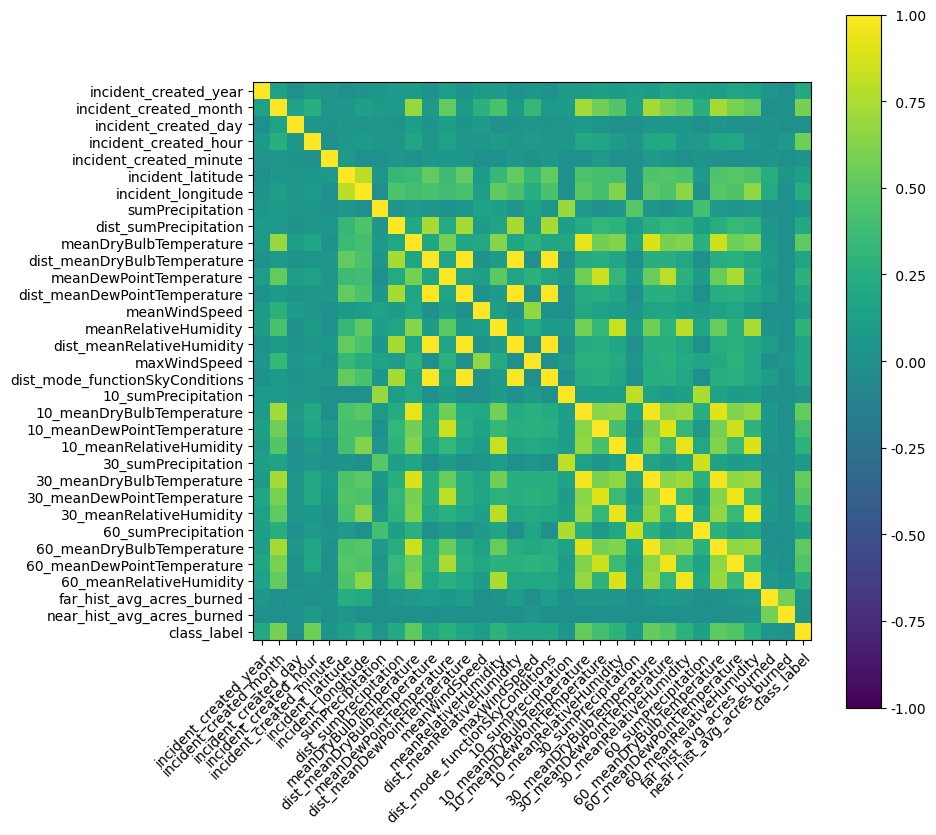

In [ ]:
display_corr_matrix(corr_matrix, text=False)

In [ ]:
fewer_features_for_corr_matrix = ["incident_created_month",
                                  "incident_created_hour",
                                  "incident_created_minute", "incident_latitude",
                                  "incident_longitude", "sumPrecipitation",
                                  "meanDryBulbTemperature",
                                  "dist_meanDryBulbTemperature",
                                  "meanRelativeHumidity",
                                  "10_sumPrecipitation", "10_meanDryBulbTemperature",
                                  "30_sumPrecipitation",
                                  "30_meanDryBulbTemperature",
                                  "60_sumPrecipitation",
                                  "60_meanDryBulbTemperature",
                                  "far_hist_avg_acres_burned",
                                  "near_hist_avg_acres_burned", "class_label"]
smaller_corr_matrix = df[fewer_features_for_corr_matrix].phik_matrix()

interval columns not set, guessing: ['incident_created_month', 'incident_created_hour', 'incident_created_minute', 'incident_latitude', 'incident_longitude', 'sumPrecipitation', 'meanDryBulbTemperature', 'dist_meanDryBulbTemperature', 'meanRelativeHumidity', '10_sumPrecipitation', '10_meanDryBulbTemperature', '30_sumPrecipitation', '30_meanDryBulbTemperature', '60_sumPrecipitation', '60_meanDryBulbTemperature', 'far_hist_avg_acres_burned', 'near_hist_avg_acres_burned', 'class_label']


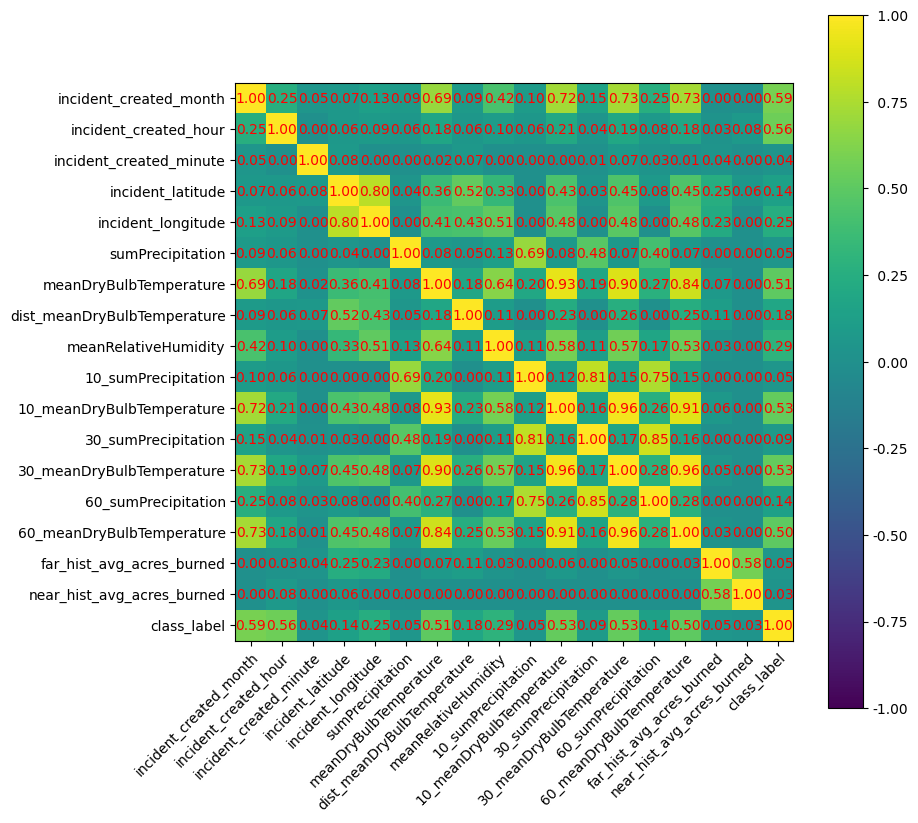

In [ ]:
display_corr_matrix(smaller_corr_matrix)

In [ ]:
# df.global_phik()    # LinAlgError: SVD did not converge

In [ ]:
# df.significance_matrix()

### Plot features to class

In [ ]:
def scatterplot_features_against_class(df, horiz_feature, vert_feature):
  ax = df[df.class_label == 0].plot(kind="scatter", x=horiz_feature, y=vert_feature, color="b", label="Non-Fire")
  df[df.class_label == 1].plot(kind="scatter", x=horiz_feature, y=vert_feature, ax=ax, color="r", label="Fire")
  ax.set_xlabel(horiz_feature)
  ax.set_ylabel(vert_feature)
  plt.show()

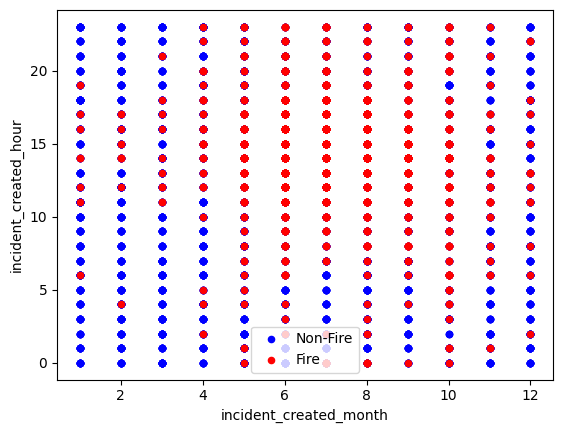

In [ ]:
scatterplot_features_against_class(df, "incident_created_month", "incident_created_hour")

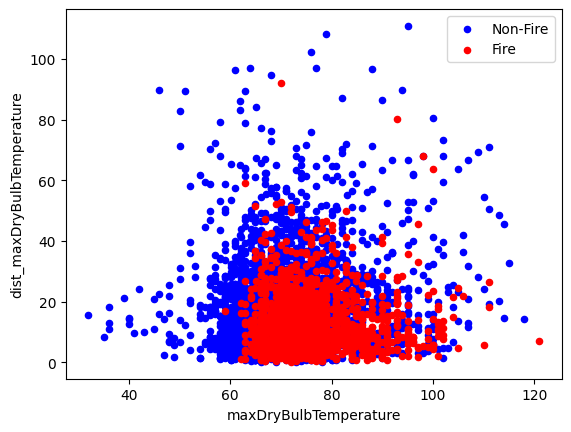

In [ ]:
scatterplot_features_against_class(df, "maxDryBulbTemperature", "dist_maxDryBulbTemperature")

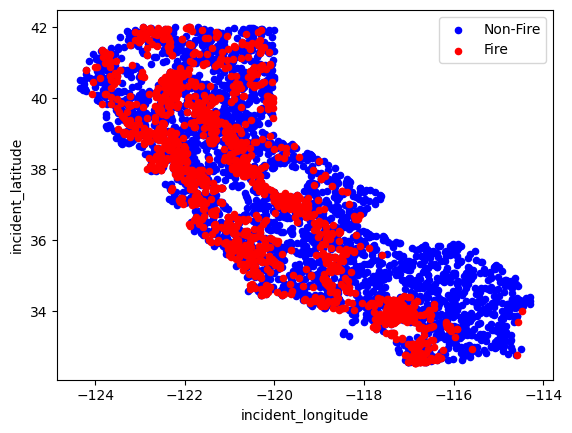

In [ ]:
scatterplot_features_against_class(df, "incident_longitude", "incident_latitude")

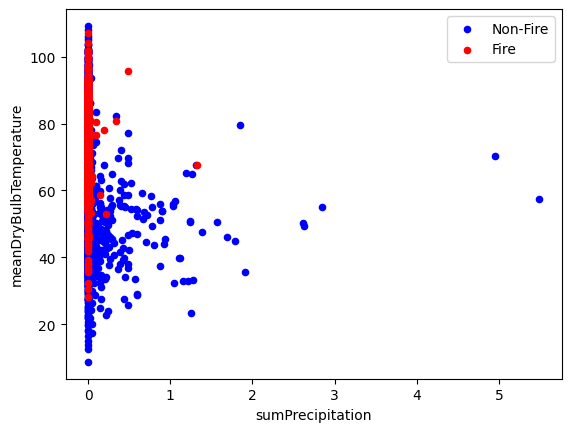

In [ ]:
scatterplot_features_against_class(df, "sumPrecipitation", "meanDryBulbTemperature")

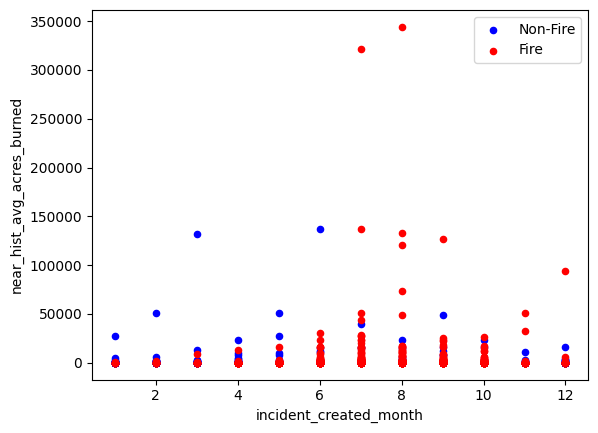

In [ ]:
scatterplot_features_against_class(df, "incident_created_month", "near_hist_avg_acres_burned")

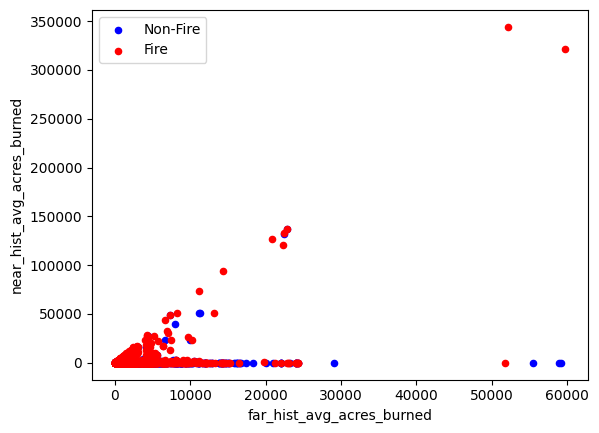

In [ ]:
scatterplot_features_against_class(df, "far_hist_avg_acres_burned", "near_hist_avg_acres_burned")

In [ ]:
def scatterplot_single_feature_against_class(df, feature):
  ax = df.plot(kind="scatter", x=feature, y="class_label")
  ax.set_xlabel(feature)
  ax.yaxis.set(ticks=[0, 1], ticklabels=["No Fire", "Fire"])
  plt.show()

In [ ]:
print(df.columns)

Index(['incident_name', 'incident_created_year', 'incident_created_month',
       'incident_created_day', 'incident_created_hour',
       'incident_created_minute', 'incident_latitude', 'incident_longitude',
       'incident_geohash', 'LCD_station_id', 'LCD_station_elevation',
       'LCD_station_distance', 'GHCN_station_id', 'GHCN_station_elevation',
       'GHCN_station_distance', 'sumPrecipitation', 'dist_sumPrecipitation',
       'maxDryBulbTemperature', 'dist_maxDryBulbTemperature',
       'minDryBulbTemperature', 'dist_minDryBulbTemperature',
       'meanDryBulbTemperature', 'dist_meanDryBulbTemperature',
       'meanDewPointTemperature', 'dist_meanDewPointTemperature',
       'meanWetBulbTemperature', 'dist_meanWetBulbTemperature',
       'meanWindSpeed', 'dist_meanWindSpeed', 'meanRelativeHumidity',
       'dist_meanRelativeHumidity', 'minRelativeHumidity',
       'dist_minRelativeHumidity', 'maxRelativeHumidity',
       'dist_maxRelativeHumidity', 'maxWindSpeed', 'dist_maxWind

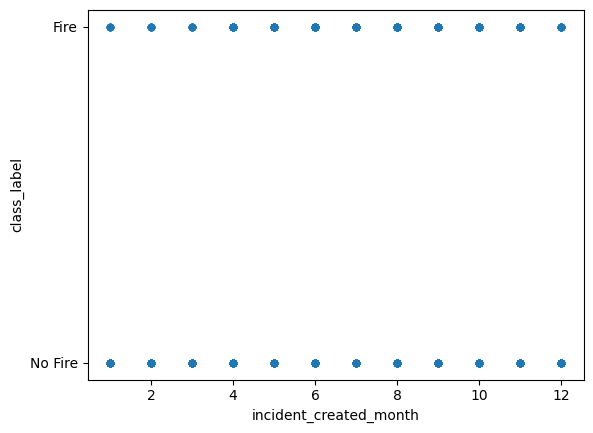

In [ ]:
scatterplot_single_feature_against_class(df, "incident_created_month")